# EDA

### 1. Summary Statistics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import re
import os
from scipy.stats import ttest_ind
import statistics

In [2]:
# Import datasets
regional_features = pd.read_csv('regional_features_final.csv')
sectoral_features = pd.read_csv('sectoral_features_final.csv')
eu_df = pd.read_csv('eu_employment.csv')
non_eu_df = pd.read_csv('non_eu_employment.csv')

In [3]:
# Remove all rows with any null values in sectoral_df
sectoral_features = sectoral_features.dropna()

# Drop rows with entirely null values from the dataset
regional_features = regional_features.dropna(how='all')
regional_features

nuts318nm nuts318cd  ...  noneu_nino_issue  total_nino
0     Hartlepool and Stockton-on-Tees     UKC11  ...             421.0       798.0
1                      South Teesside     UKC12  ...             587.0      1559.0
2                          Darlington     UKC13  ...              80.0       423.0
3                           Durham CC     UKC14  ...             505.0      1113.0
4                      Northumberland     UKC21  ...              92.0       390.0
...                               ...       ...  ...               ...         ...
1785         Causeway Coast and Glens     UKN12  ...             259.0       405.0
1786          Antrim and Newtownabbey     UKN13  ...             305.0       369.0
1787          Lisburn and Castlereagh     UKN14  ...             234.0       315.0
1788              Mid and East Antrim     UKN15  ...             353.0       412.0
1789              Fermanagh and Omagh     UKN16  ...             273.0       482.0

[1790 rows x 43 columns]

In [4]:
sectoral_features

industry_code    year  ...  migrant_share  turnover_rate
0               A  2015.0  ...       0.210542       0.076663
1               A  2016.0  ...       0.212654       0.078244
2               A  2017.0  ...       0.210383       0.082108
3               A  2018.0  ...       0.207823       0.086398
4               A  2019.0  ...       0.205499       0.084140
..            ...     ...  ...            ...            ...
195             T  2020.0  ...       0.147107       0.000654
196             T  2021.0  ...       0.148122       0.001005
197             T  2022.0  ...       0.170142       0.001492
198             T  2023.0  ...       0.189588       0.001307
199             T  2024.0  ...       0.209979       0.001022

[200 rows x 22 columns]

In [5]:
df1 = sectoral_features[sectoral_features.select_dtypes(include=[np.number]).columns]
df2 = regional_features[regional_features.select_dtypes(include=[np.number]).columns]

In [6]:
sdep_sectoral = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','q25','q50','q75','Max'], index=range(df1.shape[1]))
sdep_regional = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','q25','q50','q75','Max'], index=range(df2.shape[1]))

In [7]:
for i in range(df1.shape[1]):
  sdep_sectoral.loc[i,'Var'] = df1.columns[i]
  sdep_sectoral.loc[i,'Mean'] = round(np.mean(df1.iloc[:,i]),3)
  sdep_sectoral.loc[i,'SD'] = round(statistics.stdev(df1.iloc[:,i]),3)
  sdep_sectoral.loc[i,'Min'] = round(min(df1.iloc[:,i]),3)
  sdep_sectoral.loc[i,'q25'] = round(np.quantile(df1.iloc[:,i],0.25),3)
  sdep_sectoral.loc[i,'q50'] = round(np.quantile(df1.iloc[:,i],0.50),3)
  sdep_sectoral.loc[i,'q75'] = round(np.quantile(df1.iloc[:,i],0.75),3)
  sdep_sectoral.loc[i,'Max'] = round(max(df1.iloc[:,i]),3)

In [8]:
sdep_sectoral.head(20)

Var         Mean  ...         q75        Max
0                                    year       2019.5  ...      2022.0     2024.0
1                        automation_index        0.295  ...       0.335      0.626
2                        total_employment  1525912.855  ...  2394762.75  4829955.0
3                            uk_employees   1285849.48  ...  1924085.25  4127242.0
4                            eu_employees    121959.95  ...   185901.75   473717.0
5                        non_eu_employees    118102.91  ...    172656.5   942318.0
6                         skill_intensity        2.623  ...       3.243        3.8
7                              median_pay     2159.347  ...    2555.268    4560.75
8                      brexit_policy_flag          0.4  ...         1.0        1.0
9   skilled_worker_visa_eligibility_share        0.772  ...         1.0        1.0
10           tier2_visa_eligibility_share        0.291  ...         0.5       0.95
11                              vacancies    43648.755  ...     56833.5   210500.0
12                   union_presence_score         0.37  ...       0.515        1.0
13                           pub_sec_high         0.15  ...         0.0        1.0
14                            pub_sec_low         0.65  ...         1.0        1.0
15                         pub_sec_medium          0.2  ...         0.0        1.0
16              english_requirement_score         0.66  ...         0.9        1.0
17                           female_share        0.444  ...       0.532      0.796
18                             male_share        0.556  ...       0.722      0.834
19                          migrant_share        0.141  ...       0.179      0.319

[20 rows x 8 columns]

In [9]:
sdep_sectoral.to_csv('sectoral_summary_stats.csv')

In [10]:
for i in range(df2.shape[1]):
  sdep_regional.loc[i,'Var'] = df2.columns[i]
  sdep_regional.loc[i,'Mean'] = round(np.mean(df2.iloc[:,i]),3)
  sdep_regional.loc[i,'SD'] = round(statistics.stdev(df2.iloc[:,i]),3)
  sdep_regional.loc[i,'Min'] = round(min(df2.iloc[:,i]),3)
  sdep_regional.loc[i,'q25'] = round(np.quantile(df2.iloc[:,i],0.25),3)
  sdep_regional.loc[i,'q50'] = round(np.quantile(df2.iloc[:,i],0.50),3)
  sdep_regional.loc[i,'q75'] = round(np.quantile(df2.iloc[:,i],0.75),3)
  sdep_regional.loc[i,'Max'] = round(max(df2.iloc[:,i]),3)

sdep_regional

Var        Mean  ...        q75        Max
0                       year      2019.5  ...     2022.0     2024.0
1               uk_employees  148008.959  ...   185889.5   690538.0
2               eu_employees   14804.883  ...   17228.75   185930.0
3           non_eu_employees   14326.531  ...    15549.0   284977.0
4           pct_uk_employees       0.855  ...       0.91      0.957
5           pct_eu_employees       0.077  ...      0.085      0.196
6       pct_non_eu_employees       0.068  ...      0.074      0.274
7          employment_shareA       0.011  ...      0.014      0.171
8          employment_shareB       0.002  ...      0.001      0.108
9          employment_shareC       0.088  ...      0.116      0.296
10         employment_shareD       0.004  ...      0.005      0.071
11         employment_shareE       0.008  ...       0.01      0.061
12         employment_shareF       0.054  ...      0.064      0.154
13         employment_shareG       0.153  ...      0.171      0.305
14         employment_shareH       0.051  ...      0.061      0.247
15         employment_shareI       0.076  ...      0.087      0.214
16         employment_shareJ       0.033  ...      0.042      0.144
17         employment_shareK       0.024  ...       0.03      0.261
18         employment_shareL       0.016  ...      0.019      0.053
19         employment_shareM       0.071  ...      0.084      0.238
20         employment_shareN       0.079  ...      0.095      0.326
21         employment_shareO       0.048  ...      0.059      0.143
22         employment_shareP       0.089  ...      0.101      0.163
23         employment_shareQ       0.146  ...      0.168      0.271
24         employment_shareR       0.026  ...       0.03      0.093
25         employment_shareS       0.021  ...      0.024      0.183
26        median_monthly_pay    1919.362  ...   2127.355    3669.42
27              pct_employed      74.679  ...       77.9       88.3
28            pct_unemployed       4.323  ...        5.4      12.19
29         pct_econ_inactive      21.916  ...       24.5       37.6
30             pct_claimants       3.052  ...       3.85       12.2
31               pop_density    1484.345  ...     1449.3   45957.88
32           region_area_km2    1389.625  ...    1720.37   14740.87
33               job_density       0.843  ...       0.89       6.88
34         pct_single_parent      13.711  ...       15.5       26.7
35       eu_leave_vote_share       0.514  ...       0.58       0.72
36  pct_non_english_language       8.053  ...        9.3       33.7
37        median_house_price  243779.578  ...  288036.72  1101500.0
38             eu_nino_issue    1695.487  ...     2018.5    25770.0
39          noneu_nino_issue    2318.039  ...     2761.0    31477.0
40                total_nino    4013.634  ...    5063.25    35701.0

[41 rows x 8 columns]

In [11]:
sdep_regional.to_csv('regional_summary_stats.csv')

Now to look at correlation matrices, but first drop year columns from sectoral and regional dataframes

In [12]:
# Assuming df1 is already defined in the environment
df1 = df1.drop(columns=['year', 'brexit_policy_flag'])
df2 = df2.drop(columns=['year'])

In [13]:
# Create a correlation matrix of df1
correlation_matrix_sectoral = df1.corr()

# Display the correlation matrix
correlation_matrix_sectoral

automation_index  ...  turnover_rate
automation_index                               1.000000  ...      -0.054963
total_employment                               0.030899  ...      -0.136774
uk_employees                                   0.018272  ...      -0.157927
eu_employees                                   0.227265  ...      -0.043222
non_eu_employees                              -0.054606  ...       0.005422
skill_intensity                               -0.041059  ...      -0.097770
median_pay                                     0.242480  ...       0.074837
skilled_worker_visa_eligibility_share         -0.003621  ...      -0.201389
tier2_visa_eligibility_share                  -0.120259  ...       0.132912
vacancies                                      0.014317  ...       0.136642
union_presence_score                           0.062999  ...      -0.199261
pub_sec_high                                  -0.311035  ...      -0.211103
pub_sec_low                                   -0.184126  ...       0.143523
pub_sec_medium                                 0.497210  ...       0.017306
english_requirement_score                     -0.119958  ...      -0.187749
female_share                                  -0.606086  ...      -0.194454
male_share                                     0.606086  ...       0.194454
migrant_share                                  0.023137  ...       0.268355
turnover_rate                                 -0.054963  ...       1.000000

[19 rows x 19 columns]

In [14]:
# Create a correlation matrix of df2
correlation_matrix_regional = df2.corr()

# Display the correlation matrix
correlation_matrix_regional

uk_employees  ...  total_nino
uk_employees                  1.000000  ...    0.482275
eu_employees                  0.663964  ...    0.554257
non_eu_employees              0.592930  ...    0.542299
pct_uk_employees             -0.107506  ...   -0.590891
pct_eu_employees              0.062320  ...    0.550361
pct_non_eu_employees          0.134293  ...    0.587236
employment_shareA            -0.271948  ...   -0.309168
employment_shareB             0.017911  ...   -0.060126
employment_shareC            -0.212631  ...   -0.410532
employment_shareD             0.019384  ...   -0.104715
employment_shareE            -0.193378  ...   -0.206488
employment_shareF            -0.207205  ...   -0.269959
employment_shareG            -0.331003  ...   -0.295974
employment_shareH            -0.080549  ...    0.044249
employment_shareI            -0.106558  ...   -0.097601
employment_shareJ             0.472414  ...    0.544618
employment_shareK             0.389852  ...    0.253636
employment_shareL             0.245949  ...    0.408546
employment_shareM             0.600310  ...    0.498032
employment_shareN             0.316970  ...    0.413409
employment_shareO            -0.152140  ...   -0.126602
employment_shareP            -0.116096  ...    0.056026
employment_shareQ            -0.405177  ...   -0.272737
employment_shareR            -0.056628  ...   -0.029506
employment_shareS             0.122088  ...    0.175489
median_monthly_pay            0.247577  ...    0.303488
pct_employed                  0.039881  ...   -0.104436
pct_unemployed                0.029999  ...    0.264110
pct_econ_inactive            -0.053283  ...    0.038658
pct_claimants                -0.022484  ...    0.221670
pop_density                   0.349137  ...    0.414122
region_area_km2              -0.034713  ...   -0.219999
job_density                   0.492994  ...    0.174212
pct_single_parent            -0.065144  ...    0.158744
eu_leave_vote_share          -0.159960  ...   -0.351241
pct_non_english_language      0.206407  ...    0.731636
median_house_price            0.311625  ...    0.516999
eu_nino_issue                 0.284439  ...    0.706971
noneu_nino_issue              0.449904  ...    0.844036
total_nino                    0.482275  ...    1.000000

[40 rows x 40 columns]

In [15]:
correlation_matrix_sectoral.to_csv('correlation_matrix_sectoral.csv')
correlation_matrix_regional.to_csv('correlation_matrix_regional.csv')

## 2. Aggregate Analysis

Combining the eu and noneu datasets

In [16]:
# Convert 'Date' to datetime format
eu_df['Date'] = pd.to_datetime(eu_df['Date'], format='%b-%y')
non_eu_df['Date'] = pd.to_datetime(non_eu_df['Date'], format='%b-%y')

# Melt to long format
eu_tidy = eu_df.melt(id_vars='Date', var_name='Industry', value_name='Employment')
eu_tidy['Nationality'] = 'EU'

non_eu_tidy = non_eu_df.melt(id_vars='Date', var_name='Industry', value_name='Employment')
non_eu_tidy['Nationality'] = 'Non-EU'

In [17]:
# Combine both
combined = pd.concat([eu_tidy, non_eu_tidy], ignore_index=True)

# Remove 'Total' if present
combined = combined[combined['Industry'].str.lower() != 'total']

combined.head()

Date Industry  Employment Nationality
0 2014-07-01   Total      1839100          EU
1 2014-08-01   Total      1844100          EU
2 2014-09-01   Total      1869400          EU
3 2014-10-01   Total      1896000          EU
4 2014-11-01   Total      1935400          EU

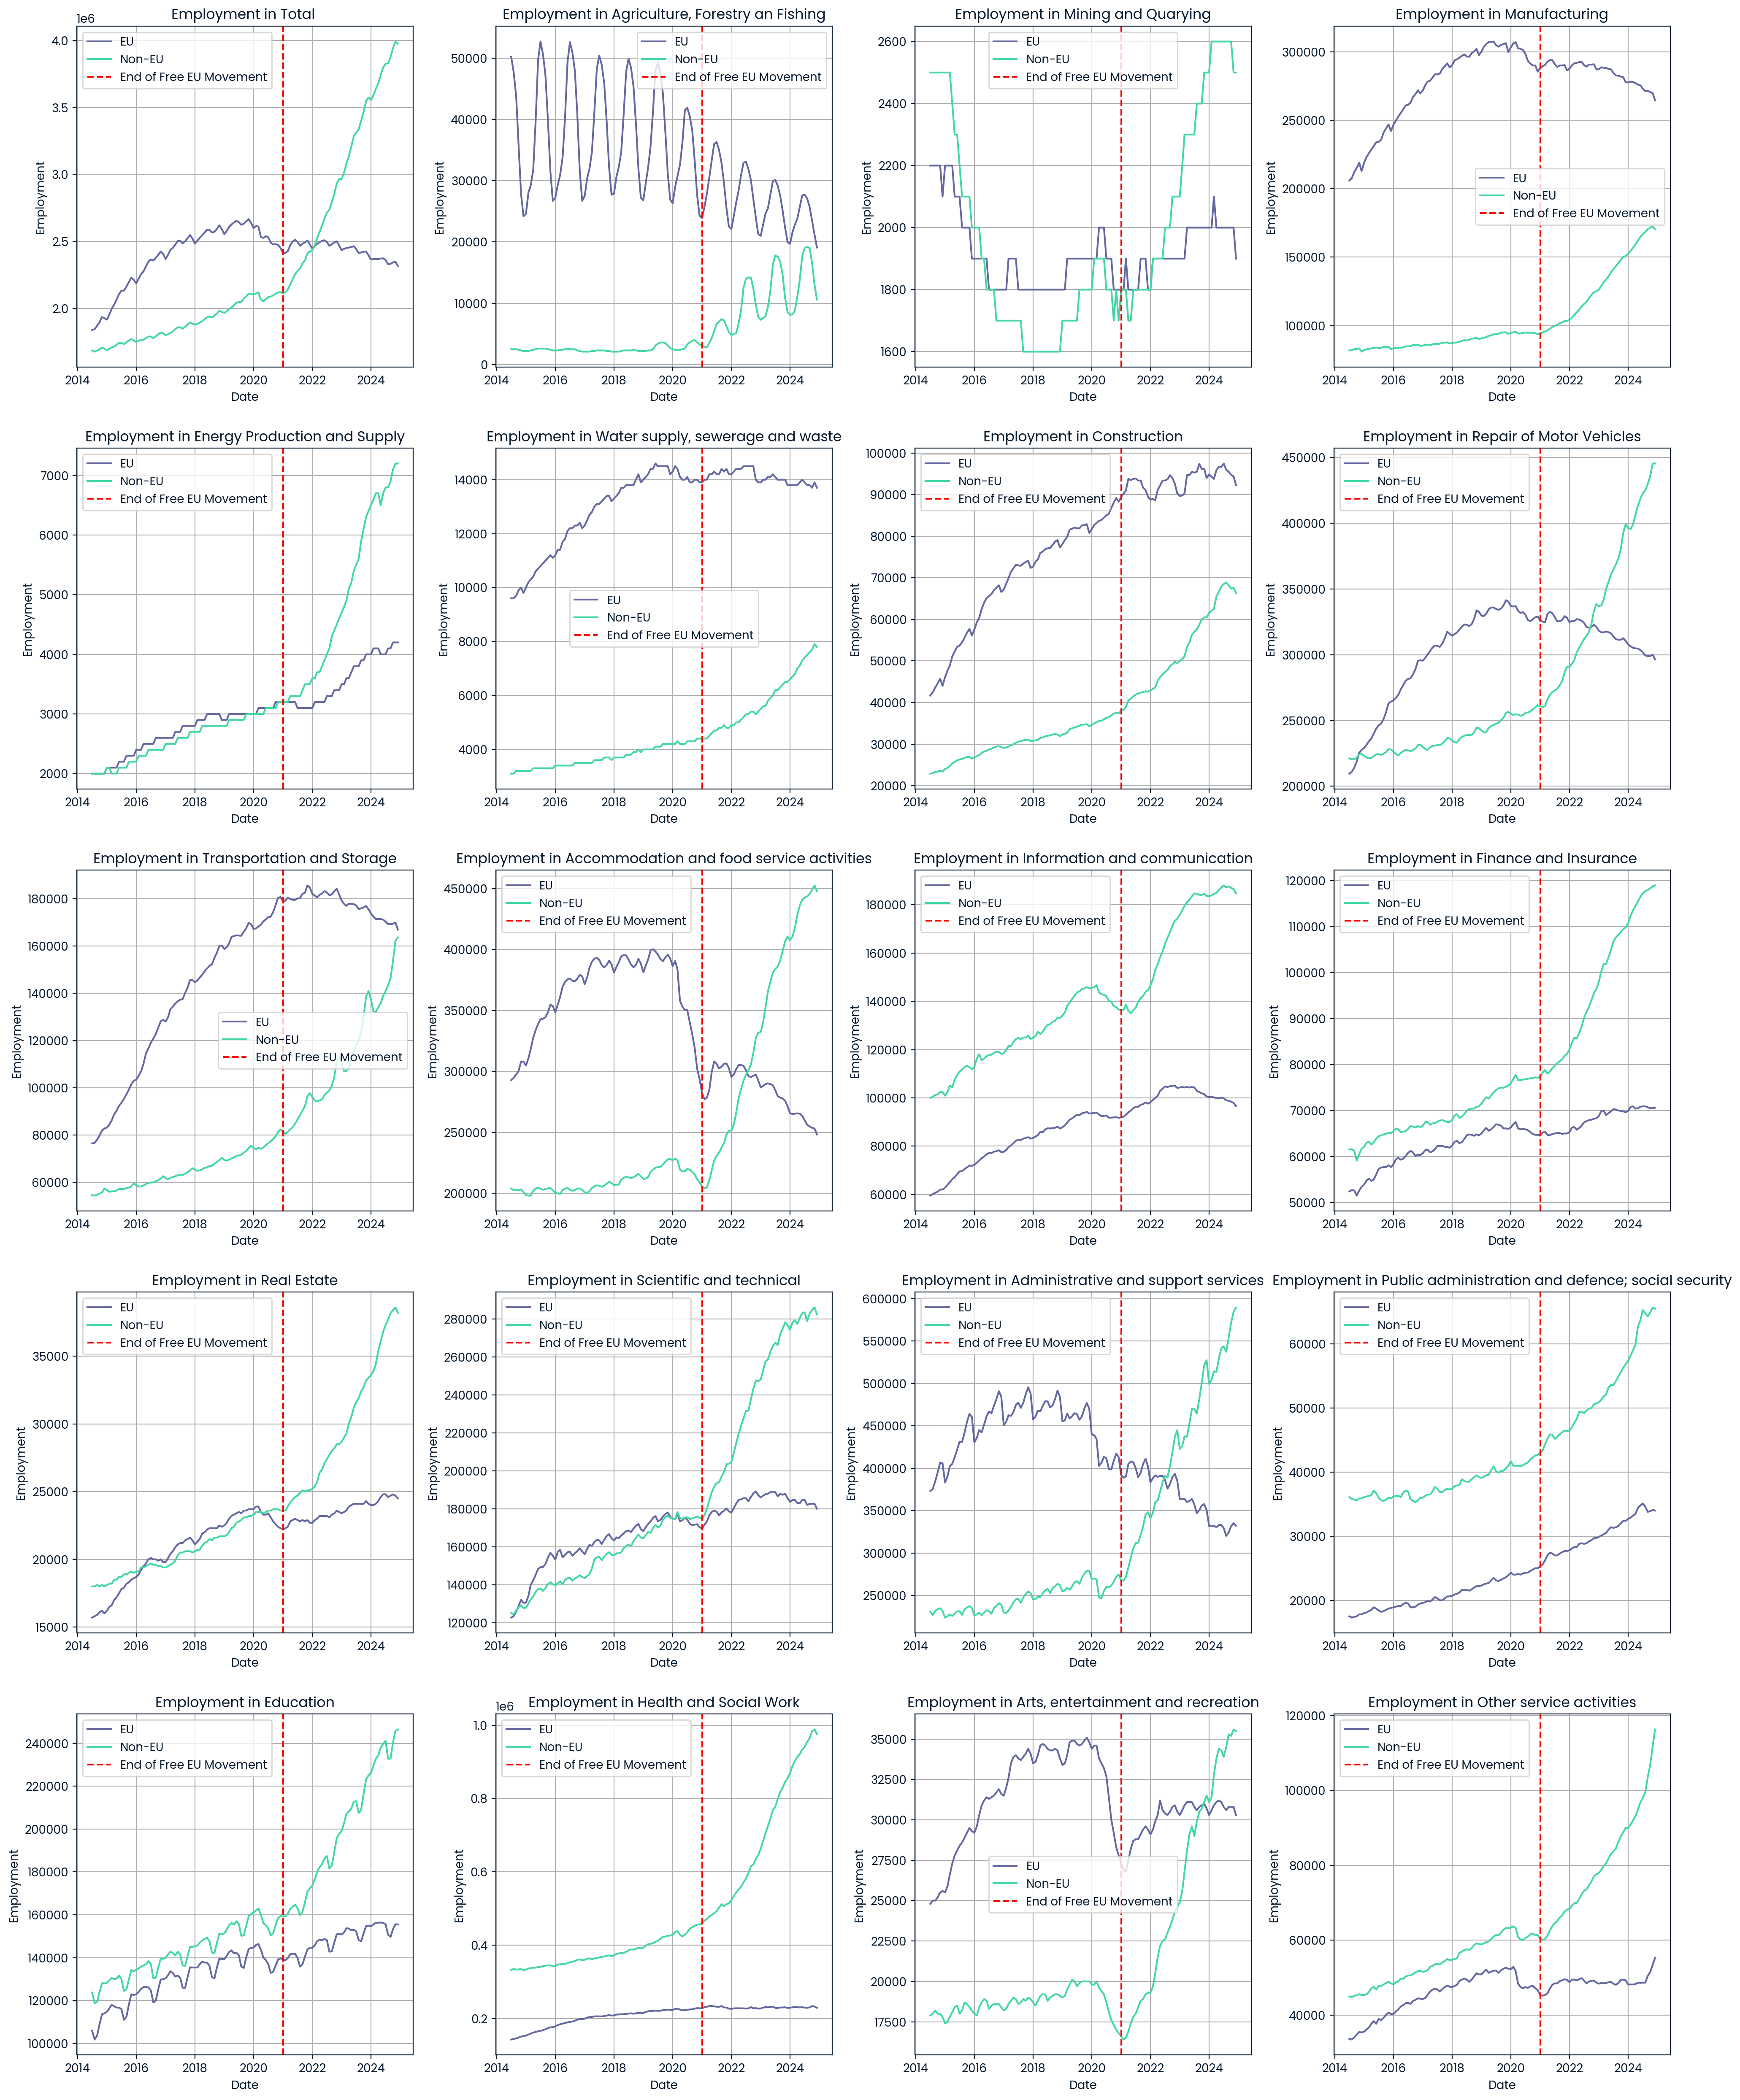

In [18]:
# Plot each industry on a 5 x 4 grid
industries = combined['Industry'].unique()
num_industries = len(industries)
num_cols = 4
num_rows = (num_industries // num_cols) + (num_industries % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten()

for i, industry in enumerate(industries):
    subset = combined[combined['Industry'] == industry]
    
    for nationality in ['EU', 'Non-EU']:
        sub = subset[subset['Nationality'] == nationality]
        axes[i].plot(sub['Date'], sub['Employment'], label=nationality)
    
    # Add red dashed line for 'end of free eu movement'
    axes[i].axvline(pd.Timestamp('2021-01-01'), color='red', linestyle='--', label='End of Free EU Movement')
    
    axes[i].set_title(f'Employment in {industry}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Employment')
    axes[i].legend()
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as a PNG file
fig.savefig('time_series_employment_by_industry.png')

In [19]:
combined.head()

Date Industry  Employment Nationality
0 2014-07-01   Total      1839100          EU
1 2014-08-01   Total      1844100          EU
2 2014-09-01   Total      1869400          EU
3 2014-10-01   Total      1896000          EU
4 2014-11-01   Total      1935400          EU

In [20]:
combined_filtered = combined[combined['Industry'].str.lower() != 'total ']
combined_filtered.head()

Date                          Industry  Employment Nationality
126 2014-07-01  Agriculture, Forestry an Fishing       50200          EU
127 2014-08-01  Agriculture, Forestry an Fishing       47700          EU
128 2014-09-01  Agriculture, Forestry an Fishing       43800          EU
129 2014-10-01  Agriculture, Forestry an Fishing       35800          EU
130 2014-11-01  Agriculture, Forestry an Fishing       27800          EU

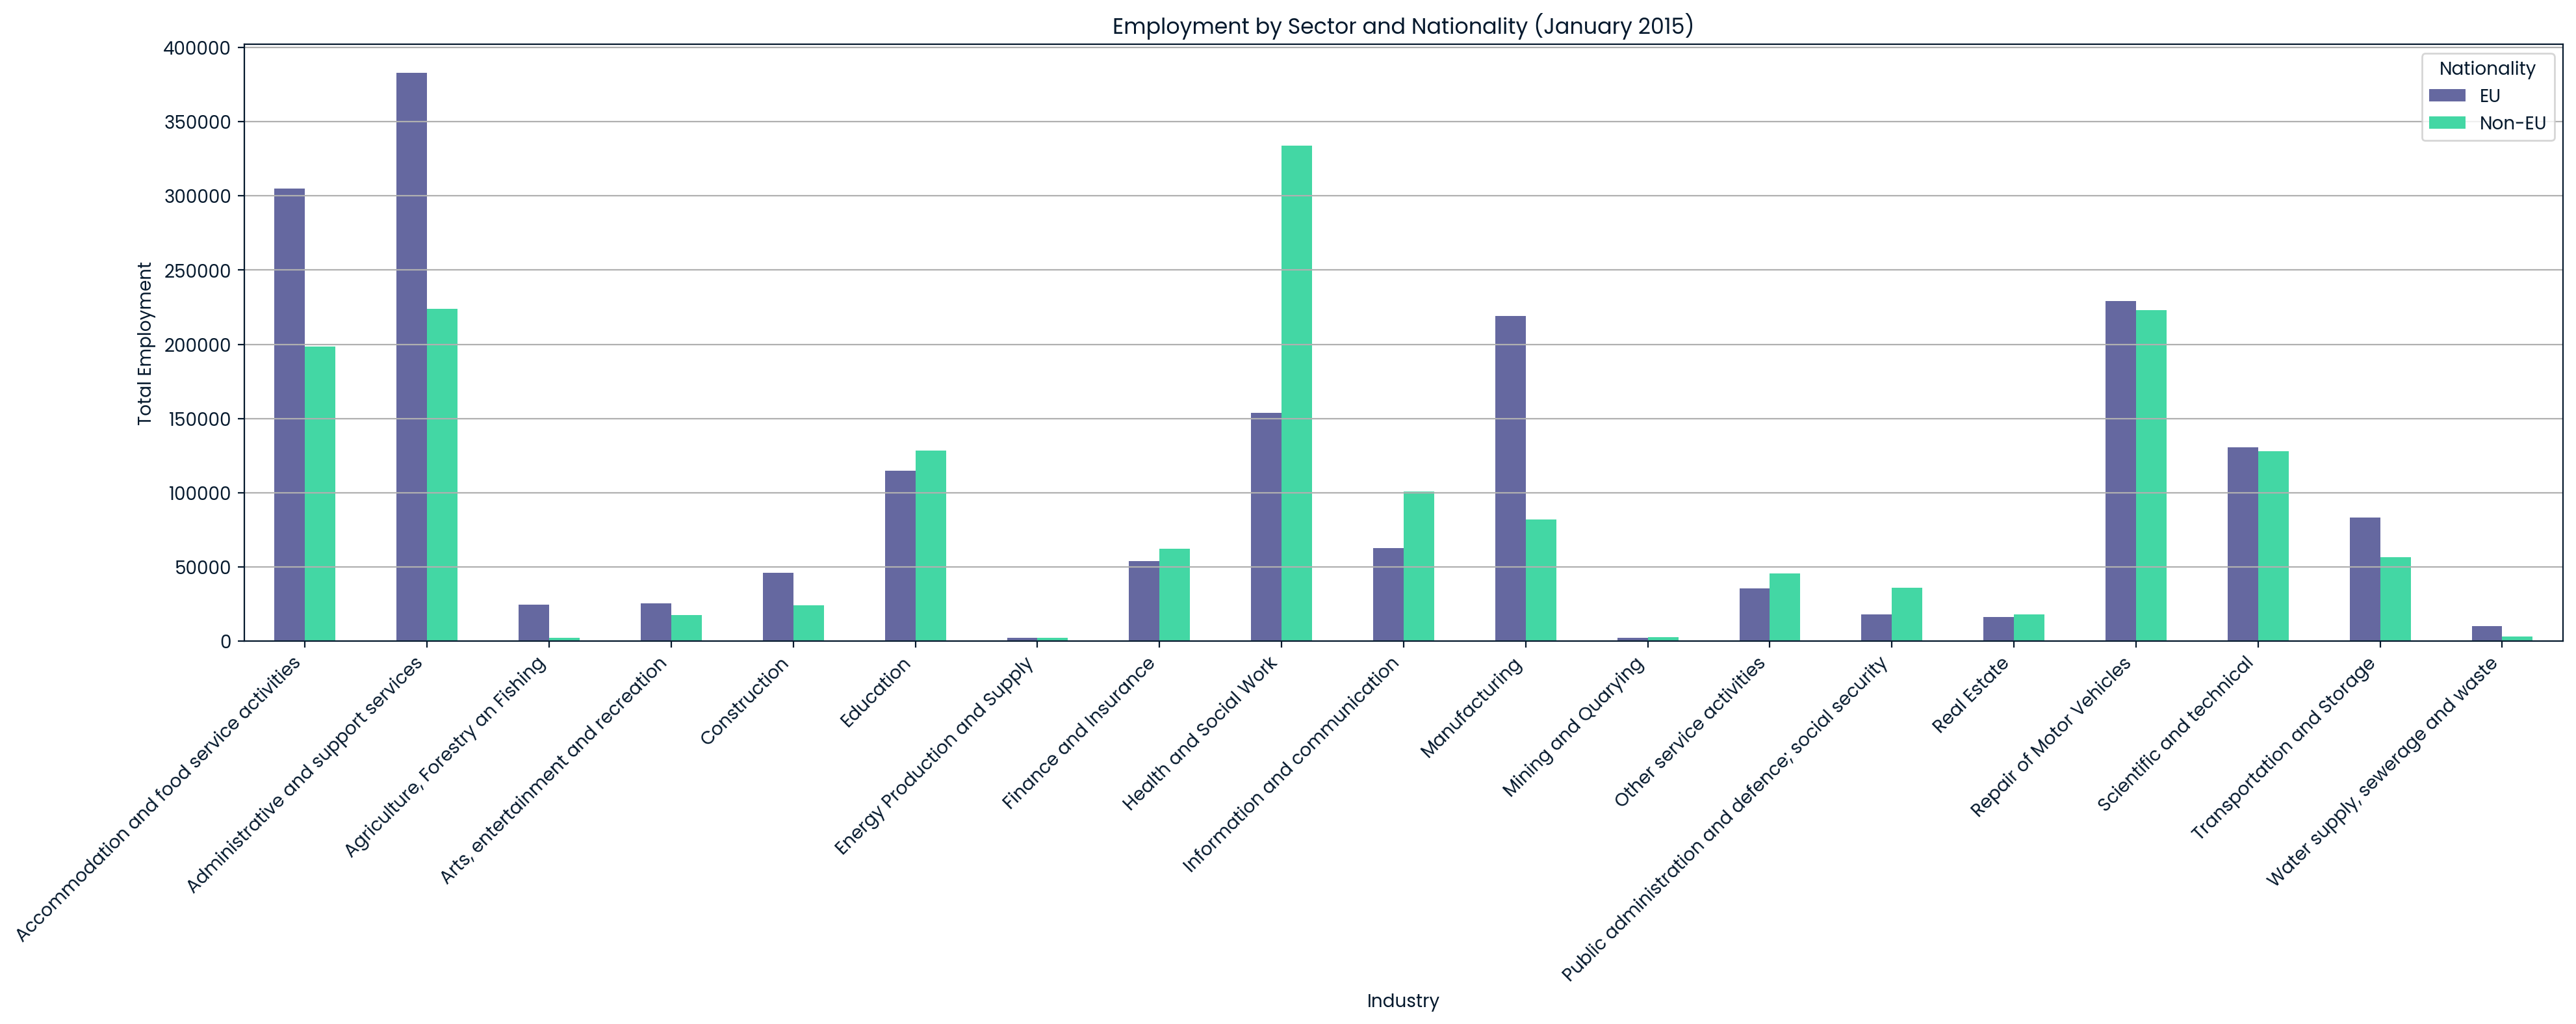

In [21]:
# Filter data for January 2015
combined_filtered_jan_2015 = combined_filtered[combined_filtered['Date'] == '2015-01-01']

# Aggregate employment by sector and nationality for January 2015
employment_by_sector_jan_2015 = combined_filtered_jan_2015.groupby(['Industry', 'Nationality'])['Employment'].sum().unstack()

# Exclude 'Total' from industry
employment_by_sector_jan_2015 = employment_by_sector_jan_2015[employment_by_sector_jan_2015.index.str.lower() != 'total']

# Plot the barchart with bars side by side for January 2015
fig, ax = plt.subplots(figsize=(20, 8))

employment_by_sector_jan_2015.plot(kind='bar', stacked=False, ax=ax)

ax.set_xlabel('Industry')
ax.set_ylabel('Total Employment')
ax.set_xticklabels(employment_by_sector_jan_2015.index, rotation=45, ha='right')
ax.set_title('Employment by Sector and Nationality (January 2015)')
ax.grid(axis='y')

plt.tight_layout()

# Save the figure as a PNG file
fig.savefig('employment_by_sector_jan_2015.png')

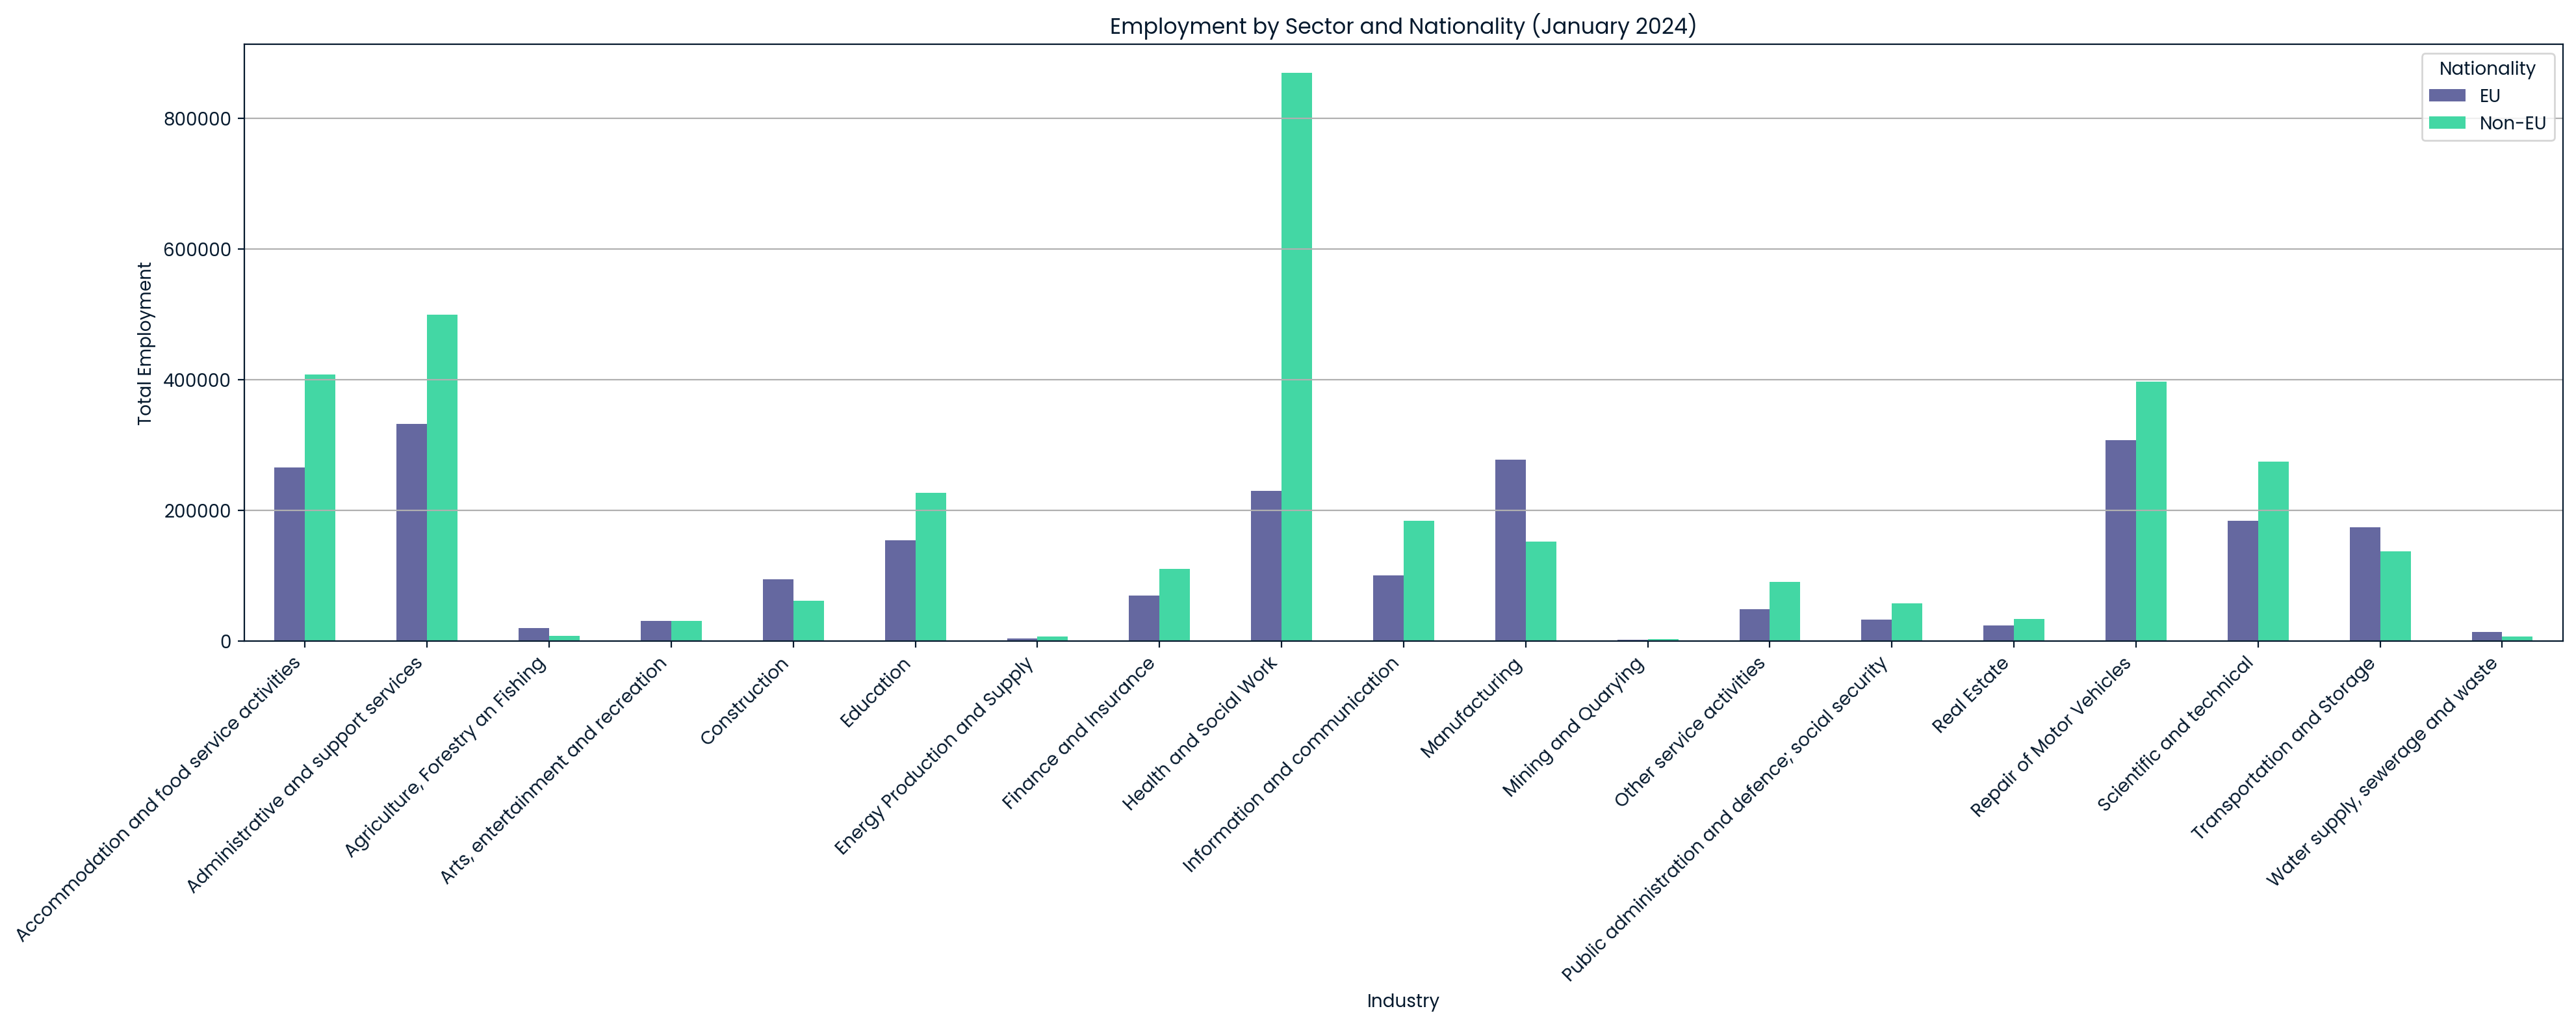

In [22]:
# Filter data for January 2024
combined_filtered_jan_2024 = combined_filtered[combined_filtered['Date'] == '2024-01-01']

# Aggregate employment by sector and nationality for January 2024
employment_by_sector_jan_2024 = combined_filtered_jan_2024.groupby(['Industry', 'Nationality'])['Employment'].sum().unstack()

# Exclude 'Total' from industry
employment_by_sector_jan_2024 = employment_by_sector_jan_2024[employment_by_sector_jan_2024.index.str.lower() != 'total']

# Plot the barchart with bars side by side for January 2024
fig, ax = plt.subplots(figsize=(20, 8))

employment_by_sector_jan_2024.plot(kind='bar', stacked=False, ax=ax)

ax.set_xlabel('Industry')
ax.set_ylabel('Total Employment')
ax.set_xticklabels(employment_by_sector_jan_2024.index, rotation=45, ha='right')
ax.set_title('Employment by Sector and Nationality (January 2024)')
ax.grid(axis='y')

plt.tight_layout()

# Save the figure as a PNG file
fig.savefig('employment_by_sector_jan_2024.png')

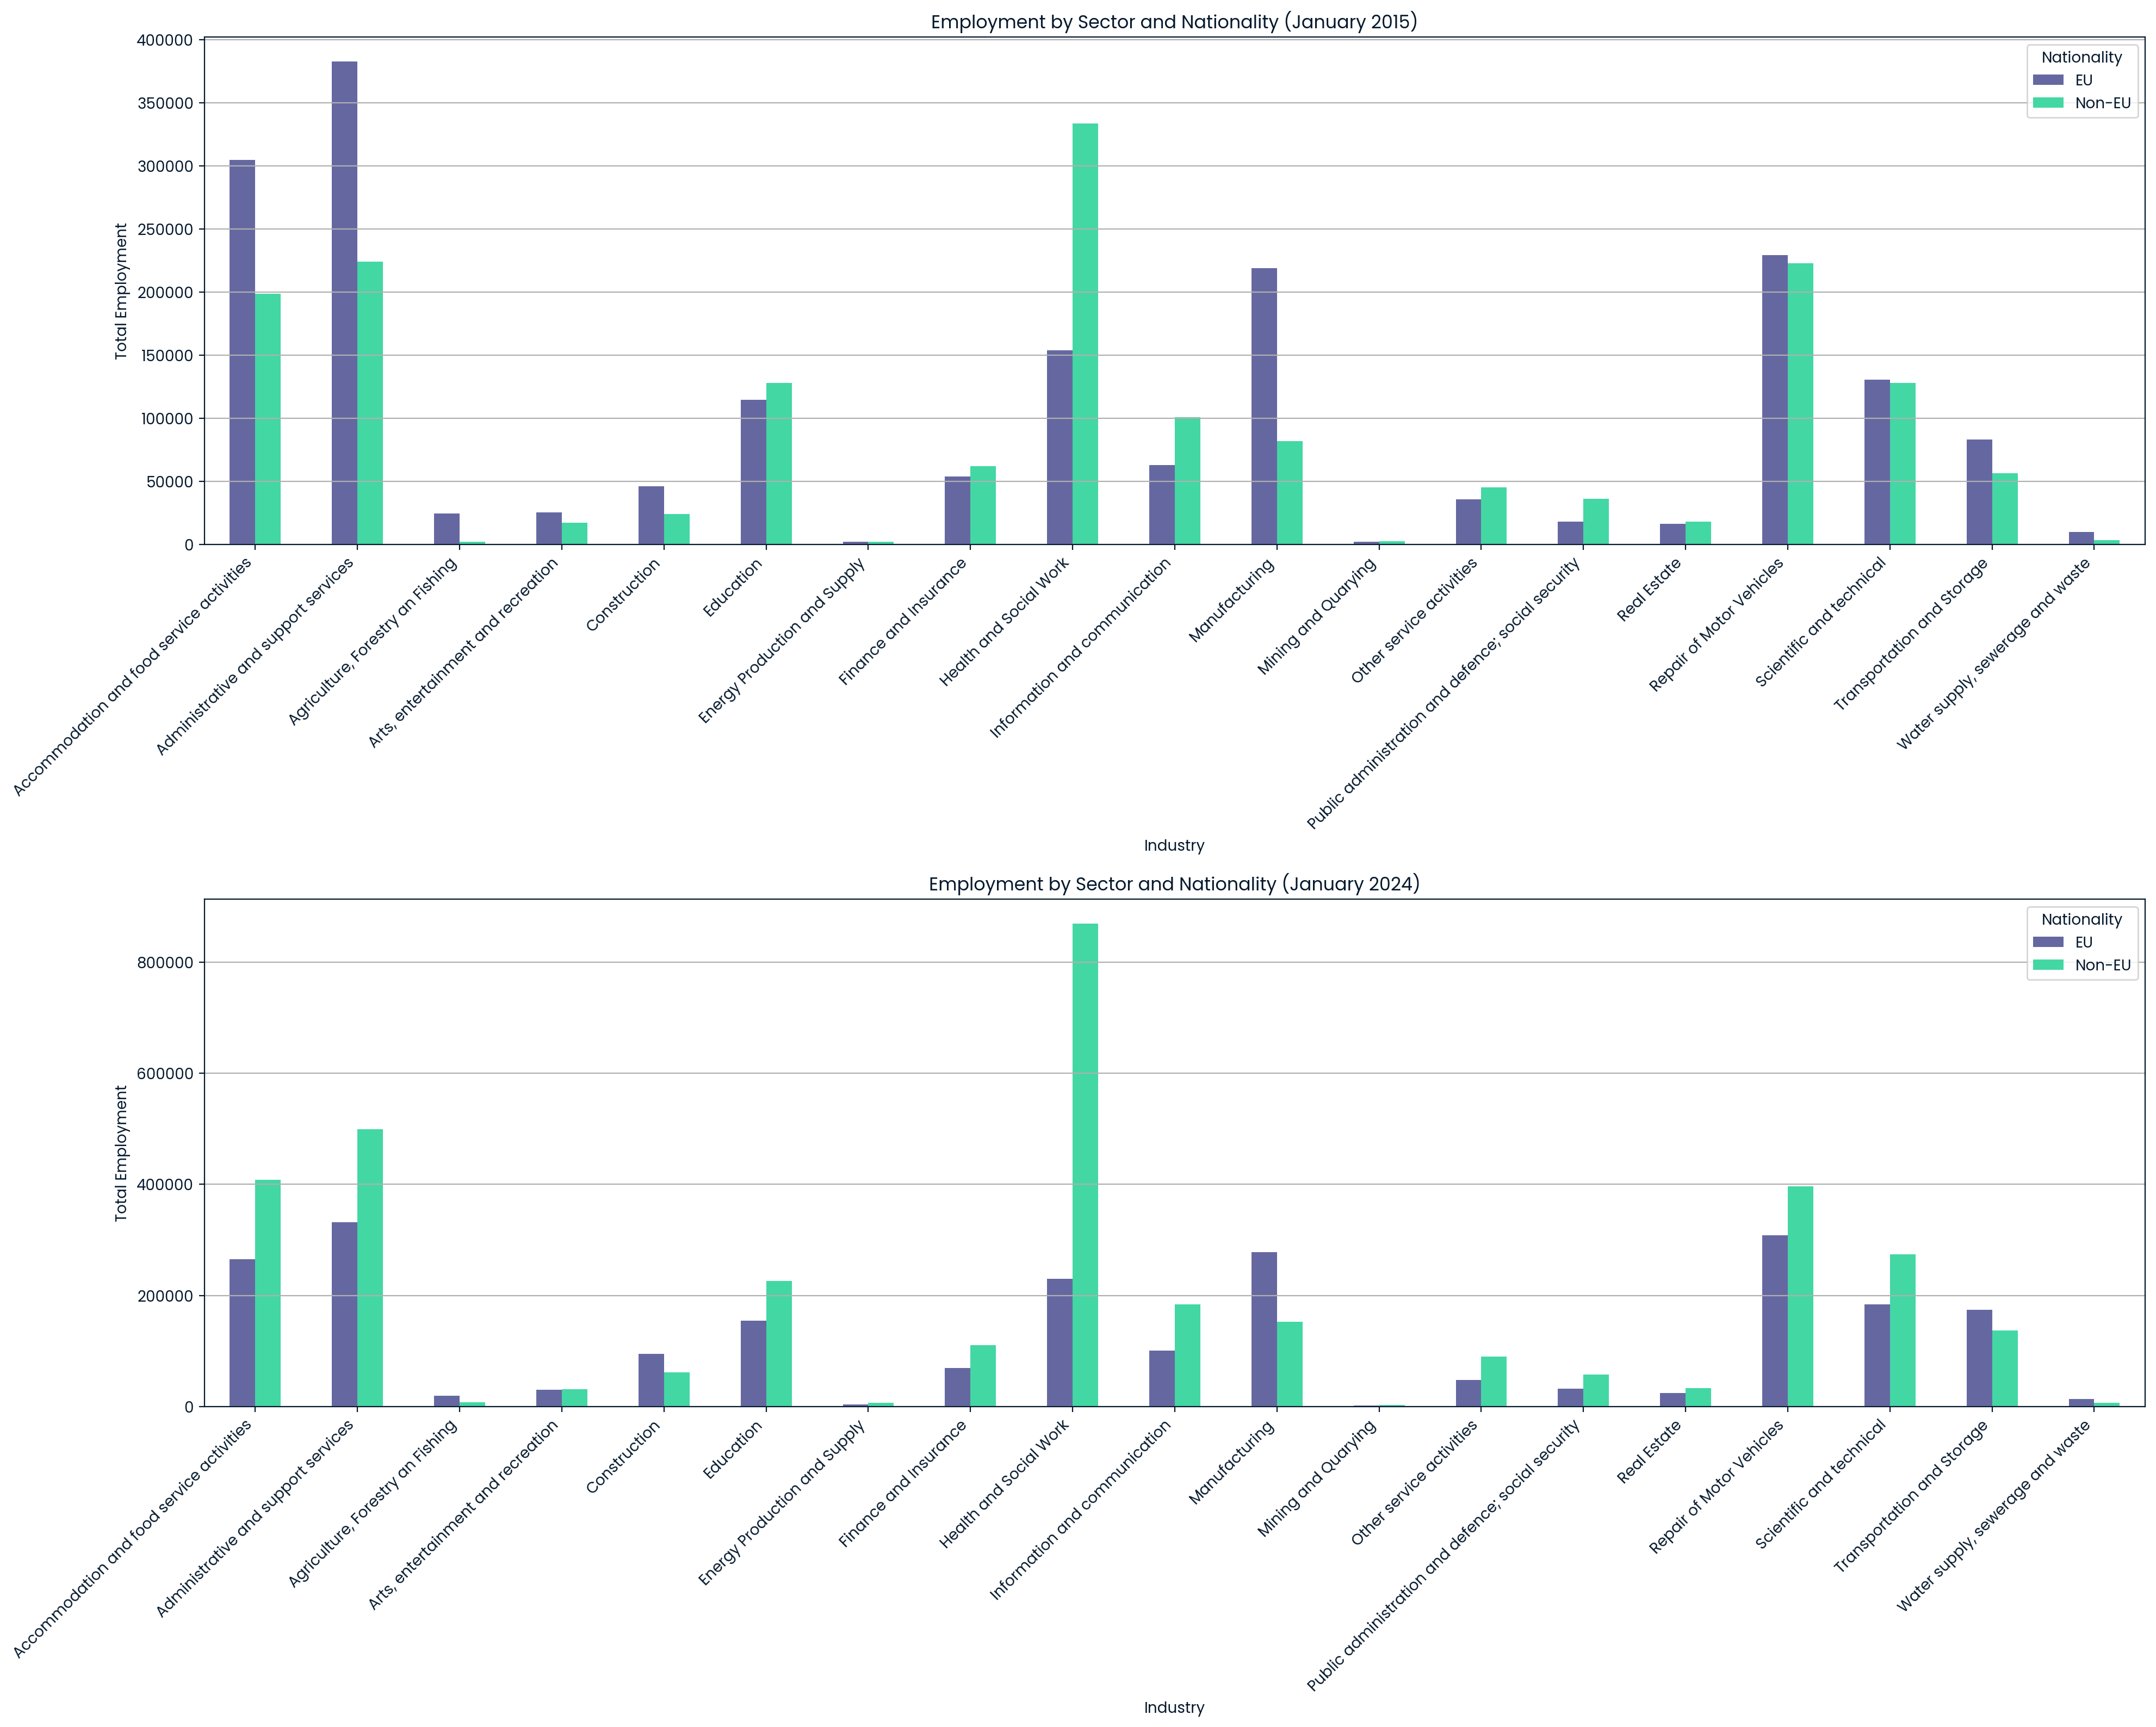

In [23]:
# Create a figure with two subplots, one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# Plot the barchart for January 2015
employment_by_sector_jan_2015.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Total Employment')
ax1.set_xticklabels(employment_by_sector_jan_2015.index, rotation=45, ha='right')
ax1.set_title('Employment by Sector and Nationality (January 2015)')
ax1.grid(axis='y')

# Plot the barchart for January 2024
employment_by_sector_jan_2024.plot(kind='bar', stacked=False, ax=ax2)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Total Employment')
ax2.set_xticklabels(employment_by_sector_jan_2024.index, rotation=45, ha='right')
ax2.set_title('Employment by Sector and Nationality (January 2024)')
ax2.grid(axis='y')

plt.tight_layout()

# Save the figure as a PNG file
fig.savefig('employment_by_sector_jan_2015_2024.png')

## 2. Regional Analysis

### 2.1 regional_features

Will now read in the relevant shape files for mapping data to the Nomenclature of Territorial Units for Statistics 3 (NUTS3) regions

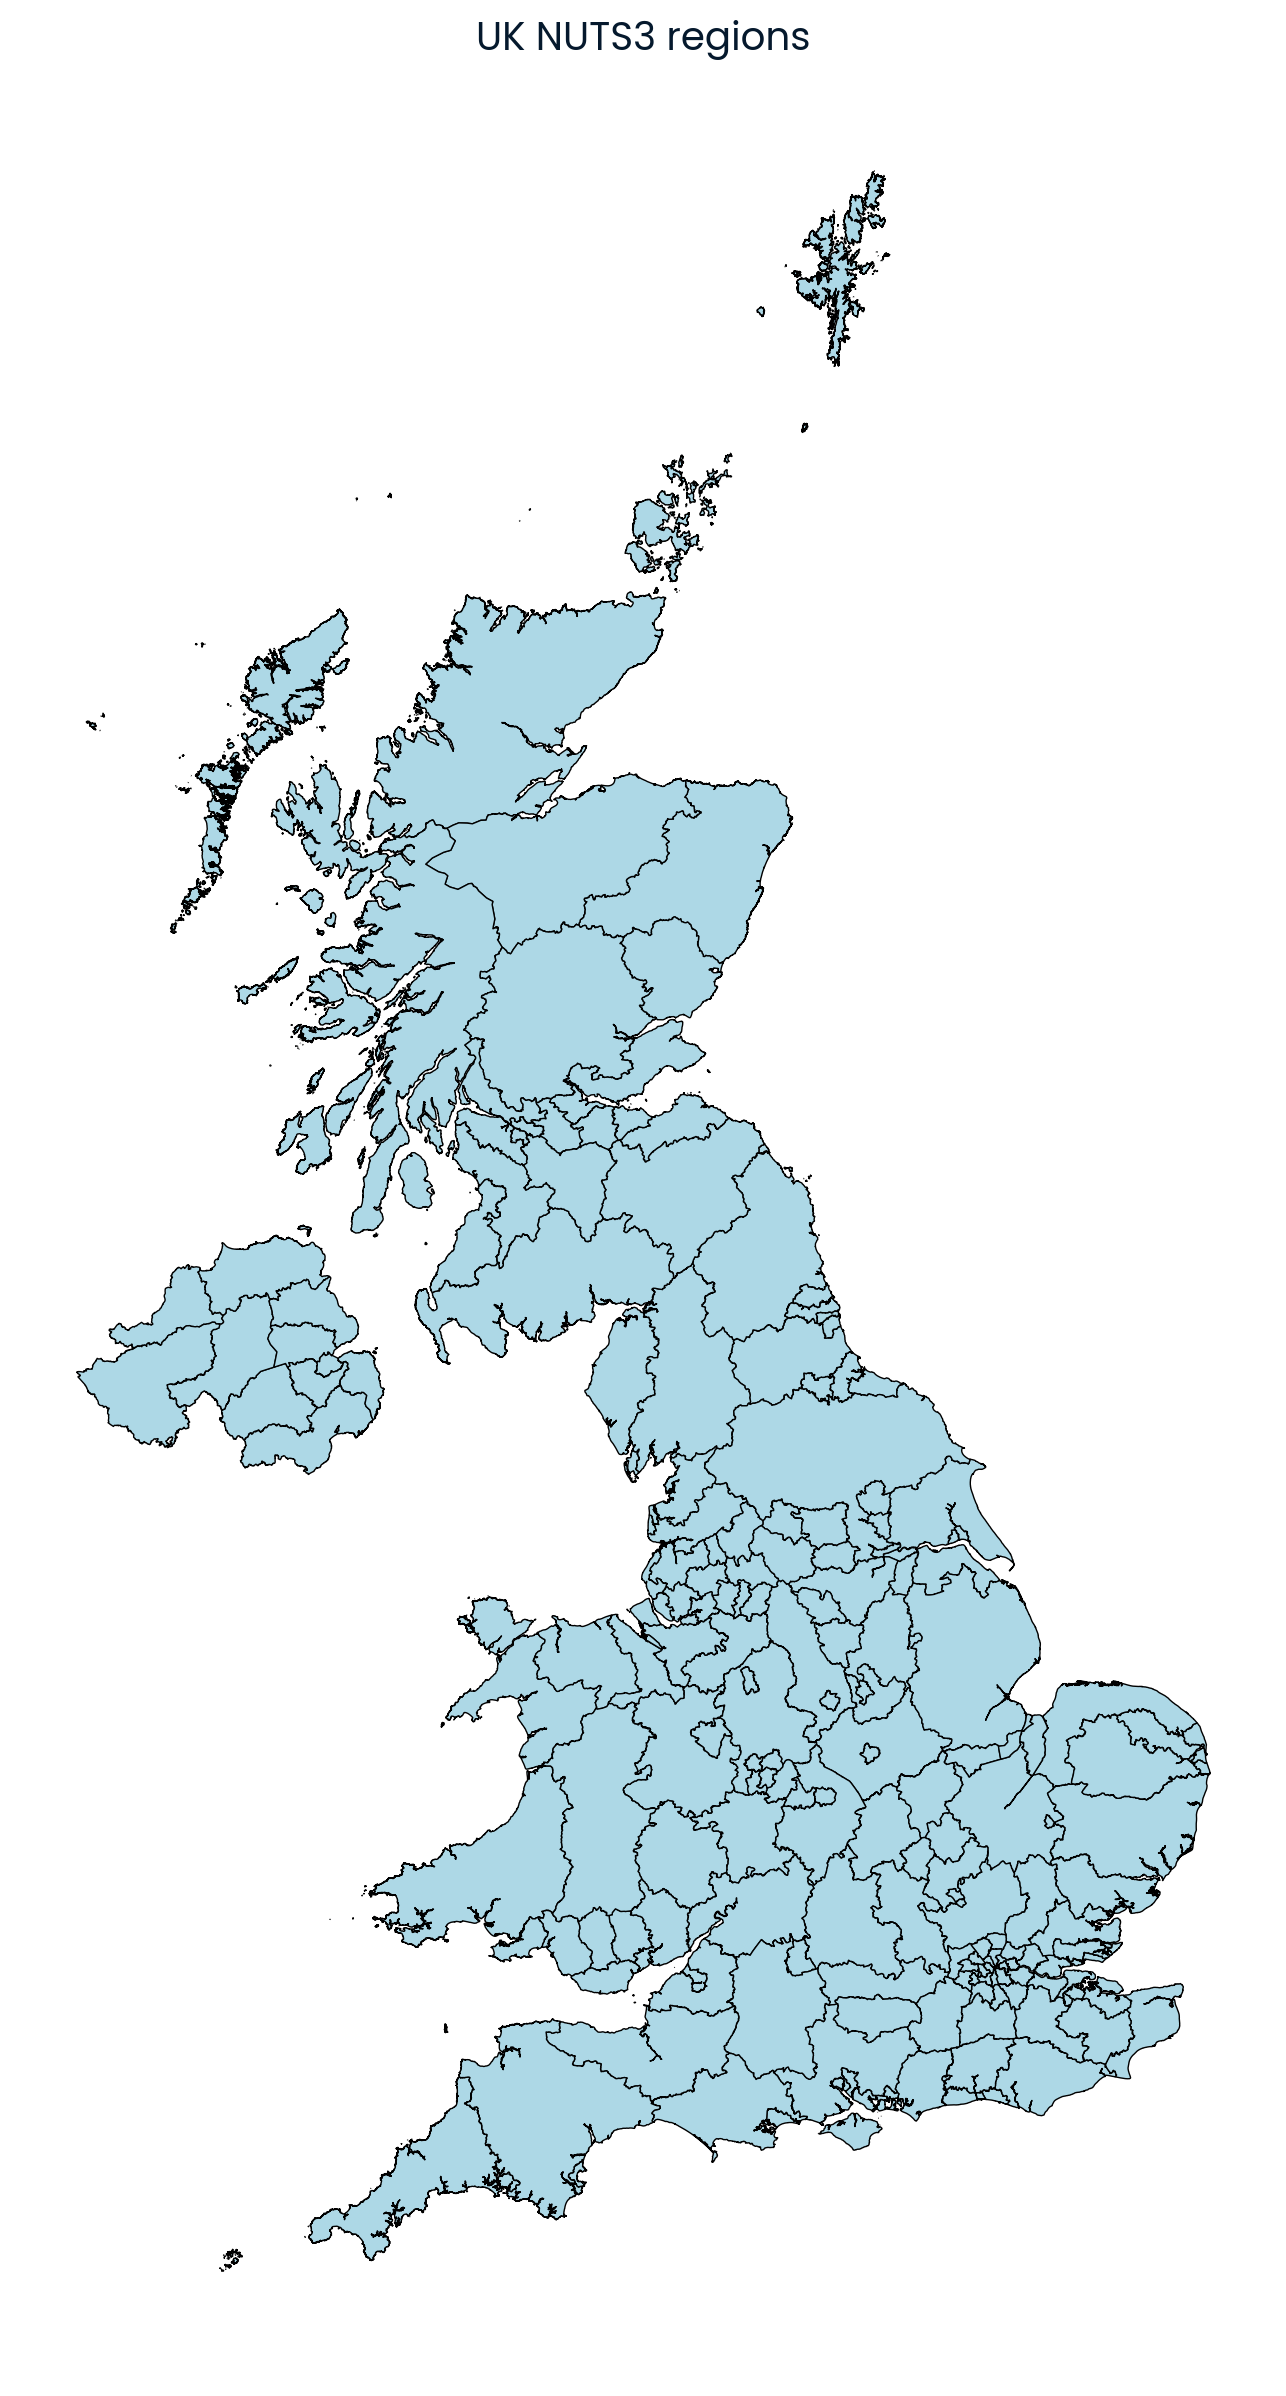

In [24]:
# Path to your shapefile (ensure all associated files are in the same directory)
shapefile_path = 'NUTS_Level_3_January_2018_GCB_in_the_United_Kingdom.shp'

# Read the shapefile into a GeoDataFrame
nuts3_gdf = gpd.read_file(shapefile_path)

# Plot the filtered wards with thinner boundary lines
fig, ax = plt.subplots(1, 1, figsize=(12, 15))
nuts3_gdf.plot(ax=ax, facecolor='lightblue', edgecolor='black', linewidth=0.5)
ax.set_title("UK NUTS3 regions", fontsize=14)
ax.set_axis_off()
plt.show()

In [25]:
nuts3_gdf.head()

nuts318cd  ...                                           geometry
0     UKC11  ...  MULTIPOLYGON (((447097.001 537152.001, 447228....
1     UKC12  ...  MULTIPOLYGON (((455776.701 528322.499, 455684....
2     UKC13  ...  POLYGON ((423475.701 524731.596, 423497.204 52...
3     UKC14  ...  POLYGON ((417139.198 558194.798, 417165.203 55...
4     UKC21  ...  MULTIPOLYGON (((398253.902 652833.898, 398317....

[5 rows x 8 columns]

In [26]:
# Merge the GeoDataFrame with the educational data on the ward code
map_df = nuts3_gdf.merge(regional_features, on="nuts318cd", how="inner")

In [27]:
map_df.head()

nuts318cd                      nuts318nm_x  ...  noneu_nino_issue  total_nino
0     UKC11  Hartlepool and Stockton-on-Tees  ...             421.0       798.0
1     UKC11  Hartlepool and Stockton-on-Tees  ...             487.0       758.0
2     UKC11  Hartlepool and Stockton-on-Tees  ...             353.0       608.0
3     UKC11  Hartlepool and Stockton-on-Tees  ...             467.0       673.0
4     UKC11  Hartlepool and Stockton-on-Tees  ...             591.0       760.0

[5 rows x 50 columns]

In [28]:
# create filtered dataframes for comparing 2015 with 2024
map_df_2015 = map_df[map_df['year'] == 2015]
map_df_2024 = map_df[map_df['year'] == 2024]

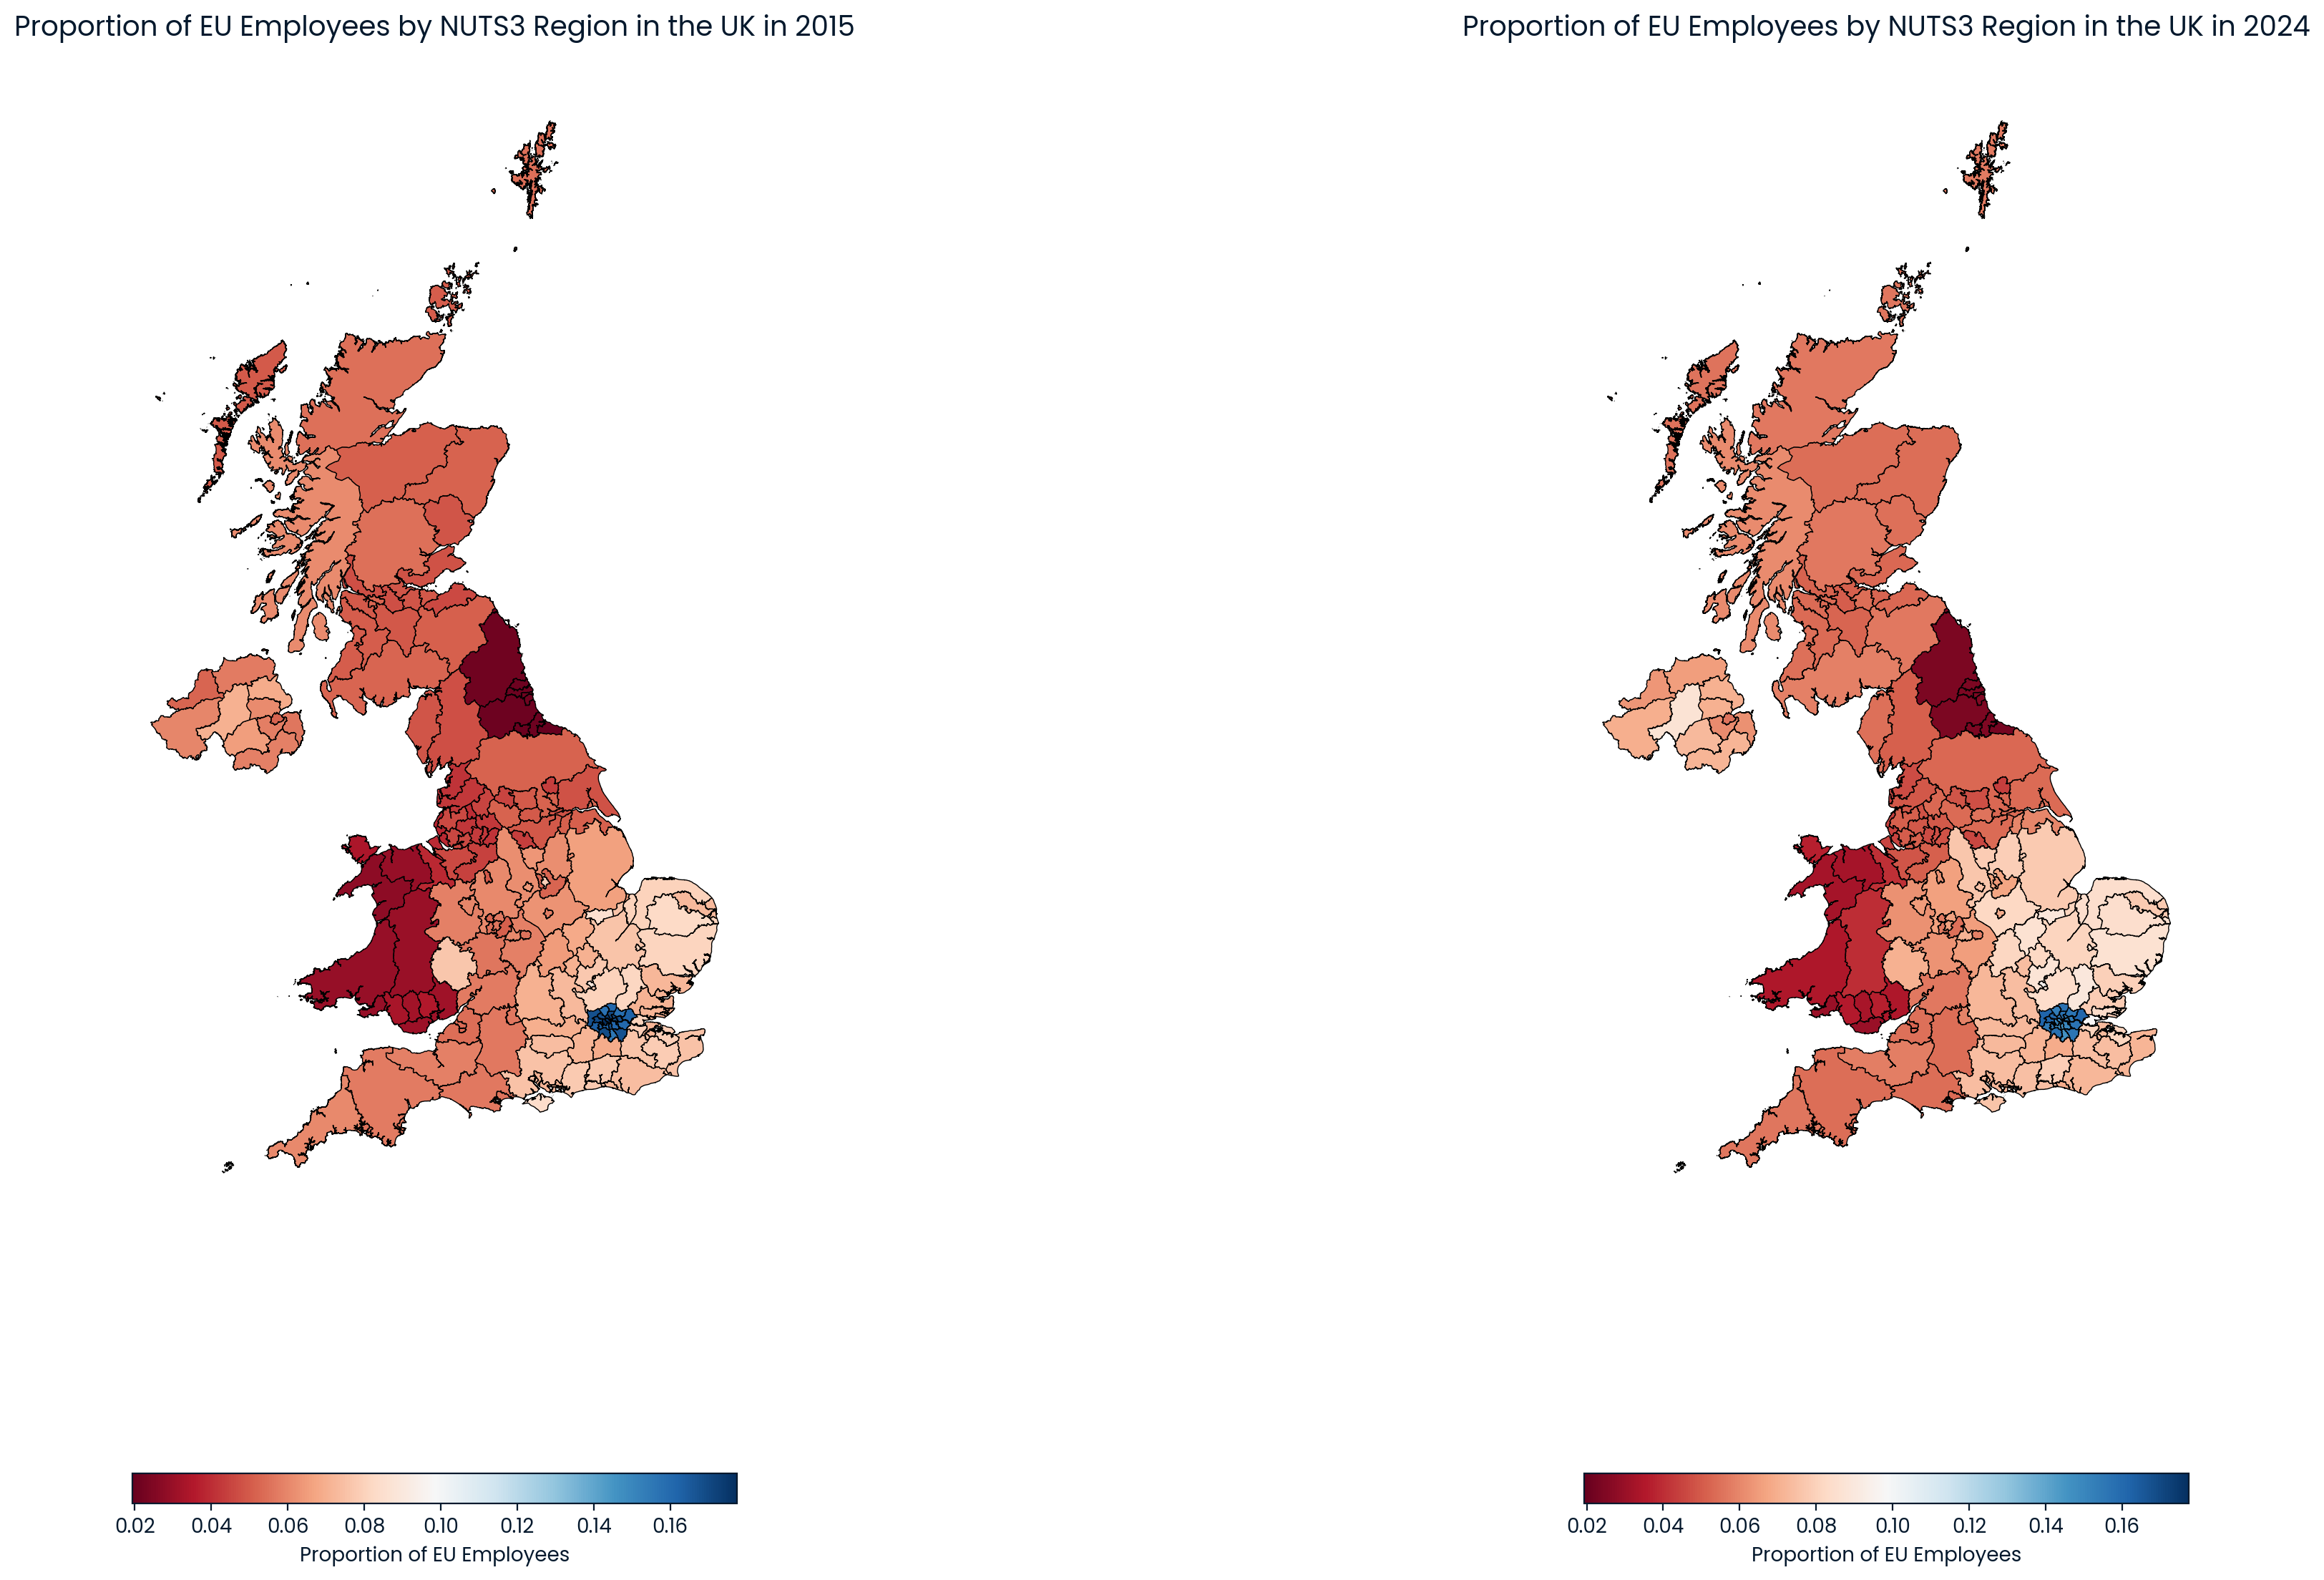

In [29]:
# Plot the maps for 2015 and 2024 side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 15))

# Plot for 2015
map_df_2015.plot(column='pct_eu_employees', ax=ax1, legend=True, 
            legend_kwds={'label': "Proportion of EU Employees",
                         'orientation': "horizontal",
                         'shrink': 0.5},
            cmap='RdBu', edgecolor='black', linewidth=0.5,
            vmin=map_df_2015['pct_eu_employees'].min(), vmax=map_df_2015['pct_eu_employees'].max())
ax1.set_title("Proportion of EU Employees by NUTS3 Region in the UK in 2015", fontsize=14)
ax1.set_axis_off()

# Plot for 2024
map_df_2024.plot(column='pct_eu_employees', ax=ax2, legend=True, 
            legend_kwds={'label': "Proportion of EU Employees",
                         'orientation': "horizontal",
                         'shrink': 0.5},
            cmap='RdBu', edgecolor='black', linewidth=0.5,
            vmin=map_df_2015['pct_eu_employees'].min(), vmax=map_df_2015['pct_eu_employees'].max())
ax2.set_title("Proportion of EU Employees by NUTS3 Region in the UK in 2024", fontsize=14)
ax2.set_axis_off()

# Save the figure as a PNG file
plt.savefig('eu_employees_comparison.png', format='png', dpi=300)

plt.show()

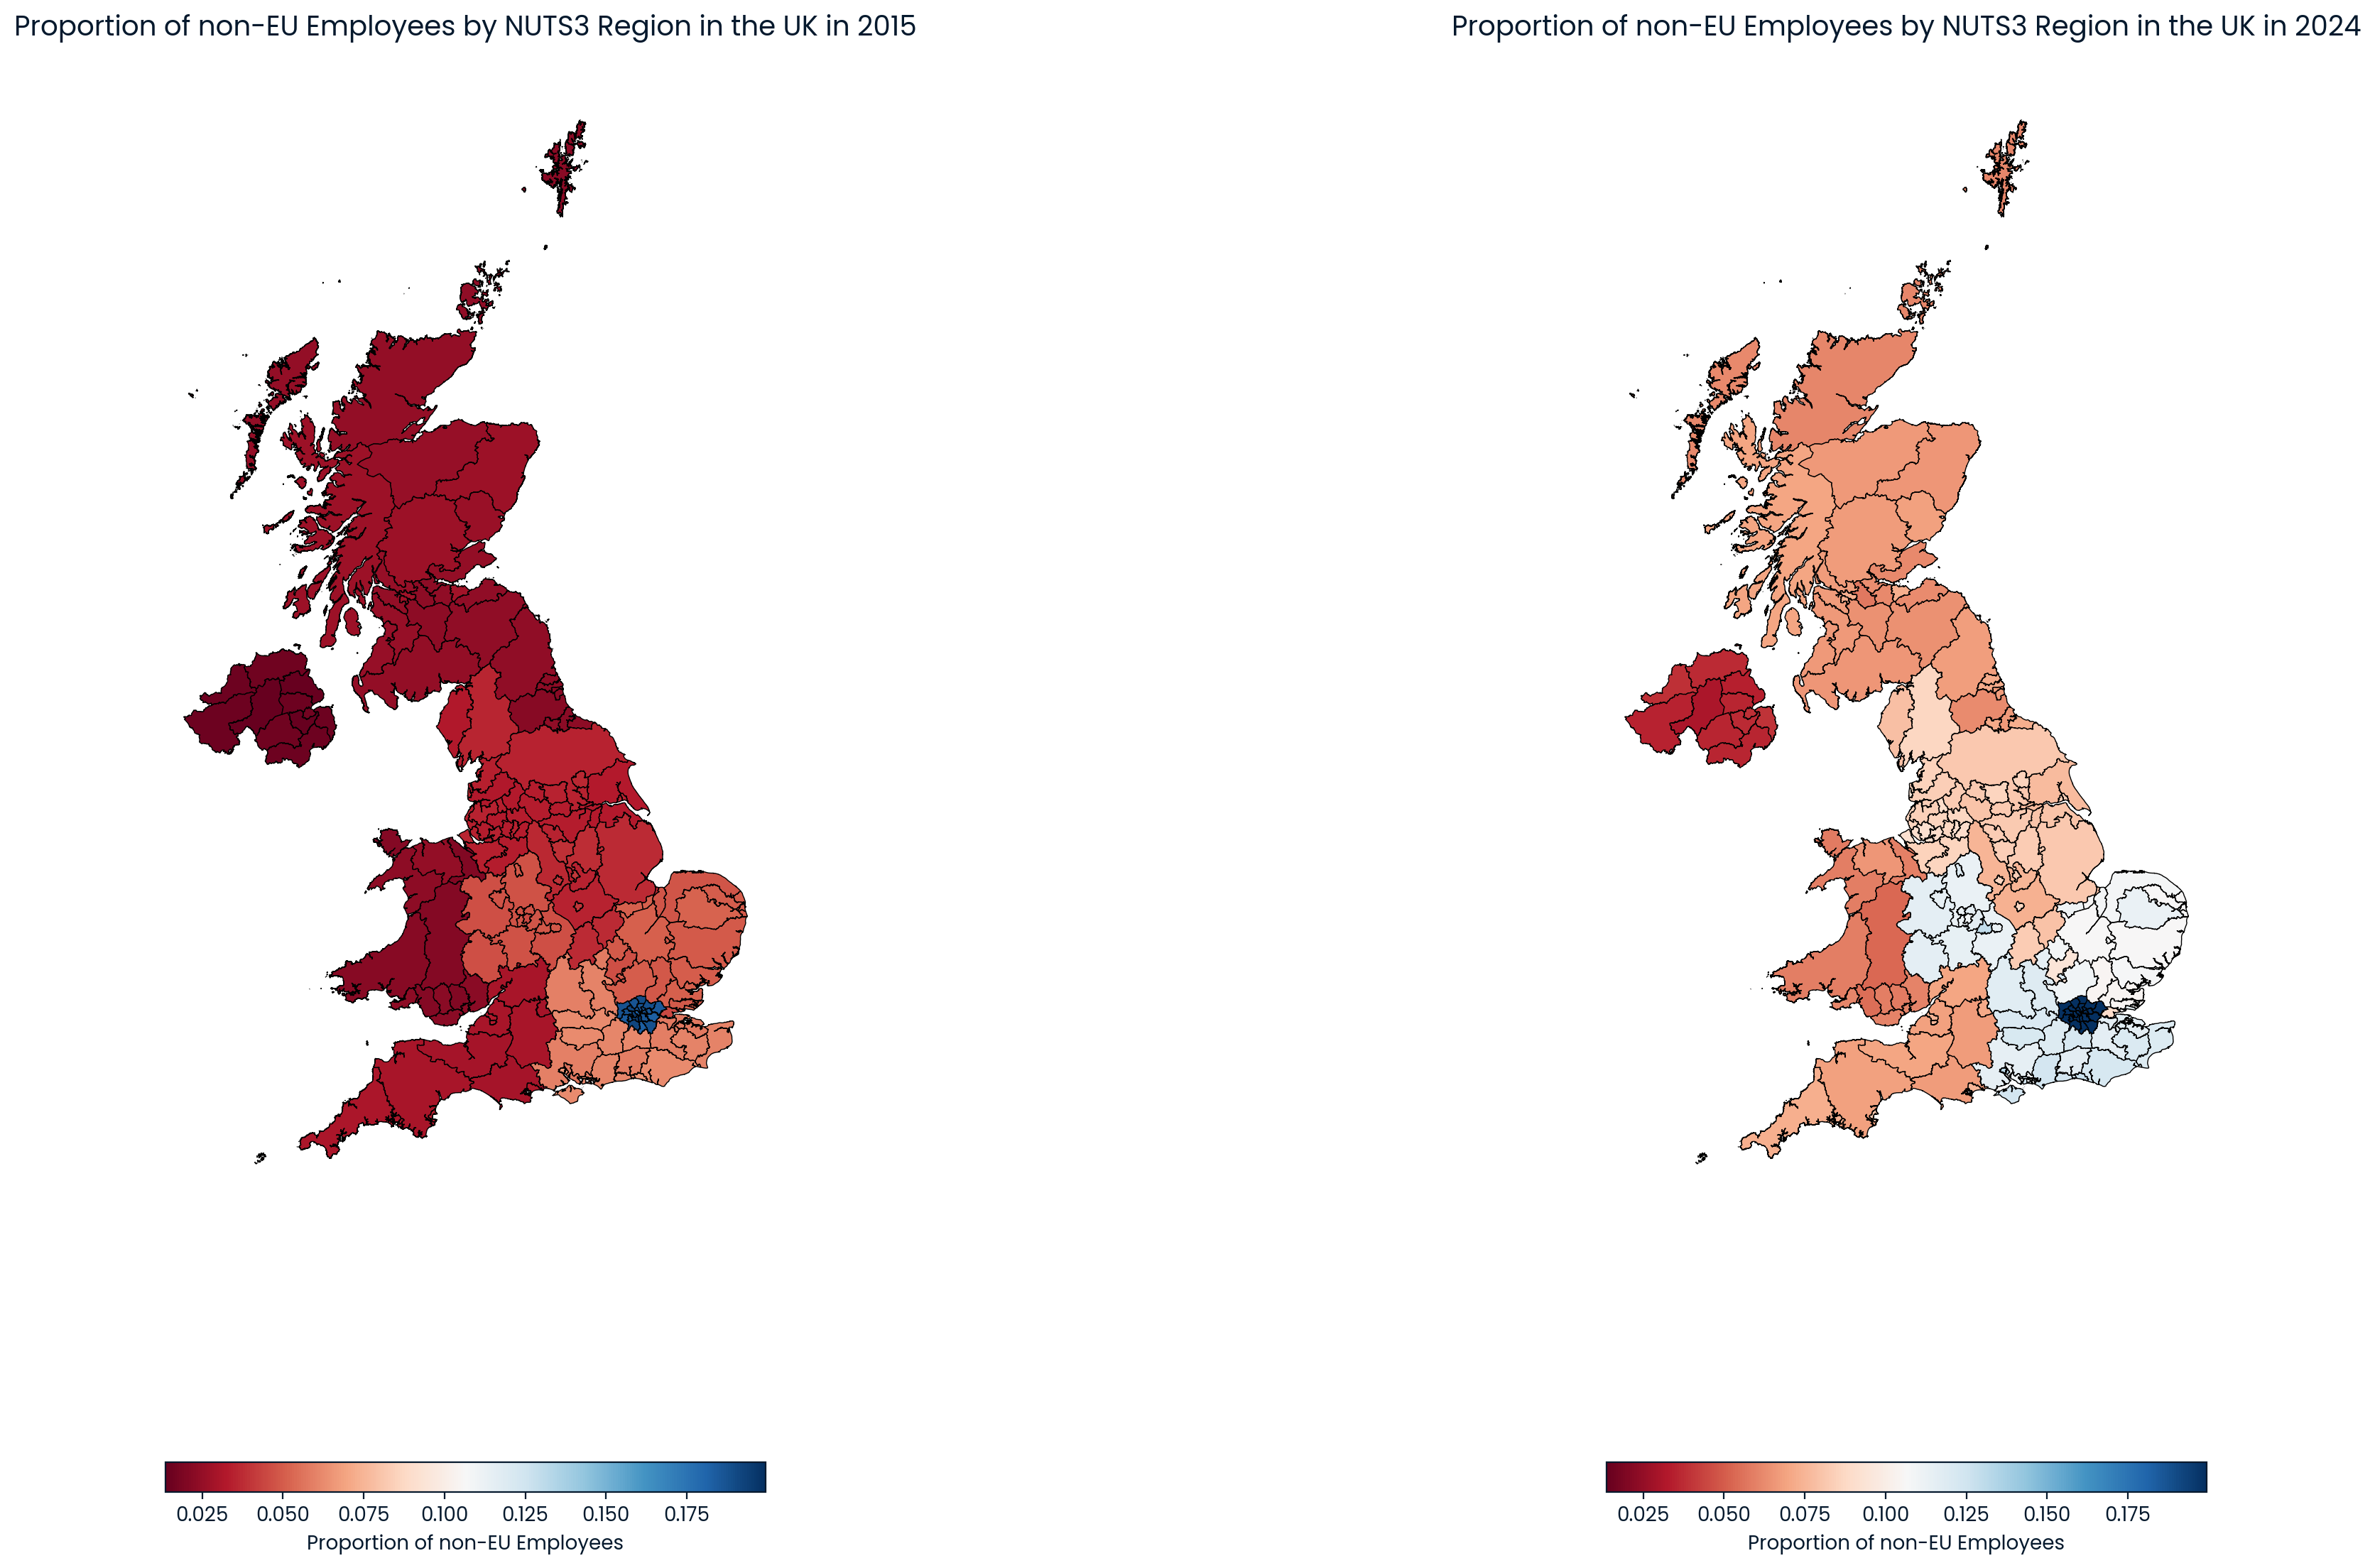

In [30]:
# Plot the maps for 2015 and 2024 side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 15))

# Plot for 2015
map_df_2015.plot(column='pct_non_eu_employees', ax=ax1, legend=True, 
            legend_kwds={'label': "Proportion of non-EU Employees",
                         'orientation': "horizontal",
                         'shrink': 0.5},
            cmap='RdBu', edgecolor='black', linewidth=0.5,
            vmin=map_df_2015['pct_non_eu_employees'].min(), vmax=map_df_2015['pct_non_eu_employees'].max())
ax1.set_title("Proportion of non-EU Employees by NUTS3 Region in the UK in 2015", fontsize=14)
ax1.set_axis_off()

# Plot for 2024
map_df_2024.plot(column='pct_non_eu_employees', ax=ax2, legend=True, 
            legend_kwds={'label': "Proportion of non-EU Employees",
                         'orientation': "horizontal",
                         'shrink': 0.5},
            cmap='RdBu', edgecolor='black', linewidth=0.5,
            vmin=map_df_2015['pct_non_eu_employees'].min(), vmax=map_df_2015['pct_non_eu_employees'].max())
ax2.set_title("Proportion of non-EU Employees by NUTS3 Region in the UK in 2024", fontsize=14)
ax2.set_axis_off()

# Save the figure as a PNG file
plt.savefig('non_eu_employees_comparison.png', format='png', dpi=300)

plt.show()

### 2.2 Demographic + Housing

Want to investigate the relation between the following demographic + housing variables and the proportion of EU + non-Eu workers in a region:
a.	pop_density
b.	pct_single_parent
c.	pct_non_english_language
d.	median_house_price

In [31]:
regional_features.head()

nuts318nm nuts318cd  ...  noneu_nino_issue  total_nino
0  Hartlepool and Stockton-on-Tees     UKC11  ...             421.0       798.0
1                   South Teesside     UKC12  ...             587.0      1559.0
2                       Darlington     UKC13  ...              80.0       423.0
3                        Durham CC     UKC14  ...             505.0      1113.0
4                   Northumberland     UKC21  ...              92.0       390.0

[5 rows x 43 columns]

In [32]:
# List of columns to keep
house_demo = [
    'eu_employees',
    'pct_eu_employees',
    'pop_density',
    'pct_single_parent',
    'pct_non_english_language',
    'median_house_price'
]

# Create new df with selected columns
house_demo_df = regional_features[house_demo]
house_demo_df.head()

eu_employees  pct_eu_employees  ...  pct_non_english_language  median_house_price
0        2387.0            0.0207  ...                      2.55           129218.75
1        1936.0            0.0193  ...                      4.35           125524.38
2        1042.0            0.0203  ...                      4.20           130500.00
3        3546.0            0.0206  ...                      1.90           110000.00
4        2183.0            0.0213  ...                      1.10           153062.50

[5 rows x 6 columns]

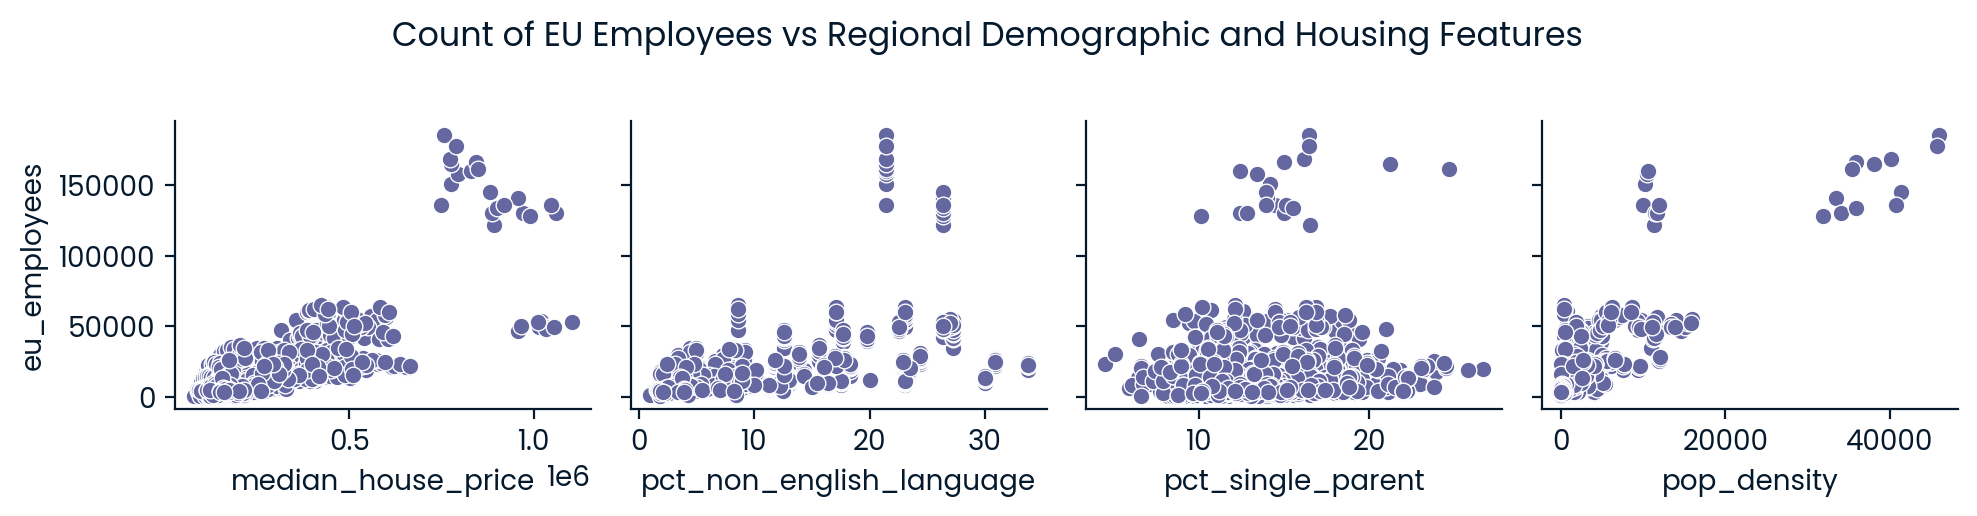

In [33]:
# Convert 'pop_density' to numeric, forcing errors to NaN
house_demo_df['pop_density'] = pd.to_numeric(house_demo_df['pop_density'], errors='coerce')

# Create a pair grid with 'eu_employees' as the y variable
g = sns.PairGrid(house_demo_df, y_vars=["eu_employees"], x_vars=house_demo_df.columns.difference(['eu_employees', 'pct_eu_employees']))
g.map(sns.scatterplot)

# Add a title to the plot
g.fig.suptitle('Count of EU Employees vs Regional Demographic and Housing Features', y=1.02)

# Adjust the layout
plt.tight_layout()

# Save the figure as a PNG file
g.savefig("regional_dem_house_pairgrid_plot.png")

### 2.3 Labour Market

In [34]:
regional_features.head()

nuts318nm nuts318cd  ...  noneu_nino_issue  total_nino
0  Hartlepool and Stockton-on-Tees     UKC11  ...             421.0       798.0
1                   South Teesside     UKC12  ...             587.0      1559.0
2                       Darlington     UKC13  ...              80.0       423.0
3                        Durham CC     UKC14  ...             505.0      1113.0
4                   Northumberland     UKC21  ...              92.0       390.0

[5 rows x 43 columns]

In [35]:
labour_market = [
    'eu_employees',
    'pct_unemployed',
    'pct_employed',
    'pct_econ_inactive',
    'pct_claimants',
    'job_density',
    'median_monthly_pay'
]
labour_df = regional_features[labour_market]

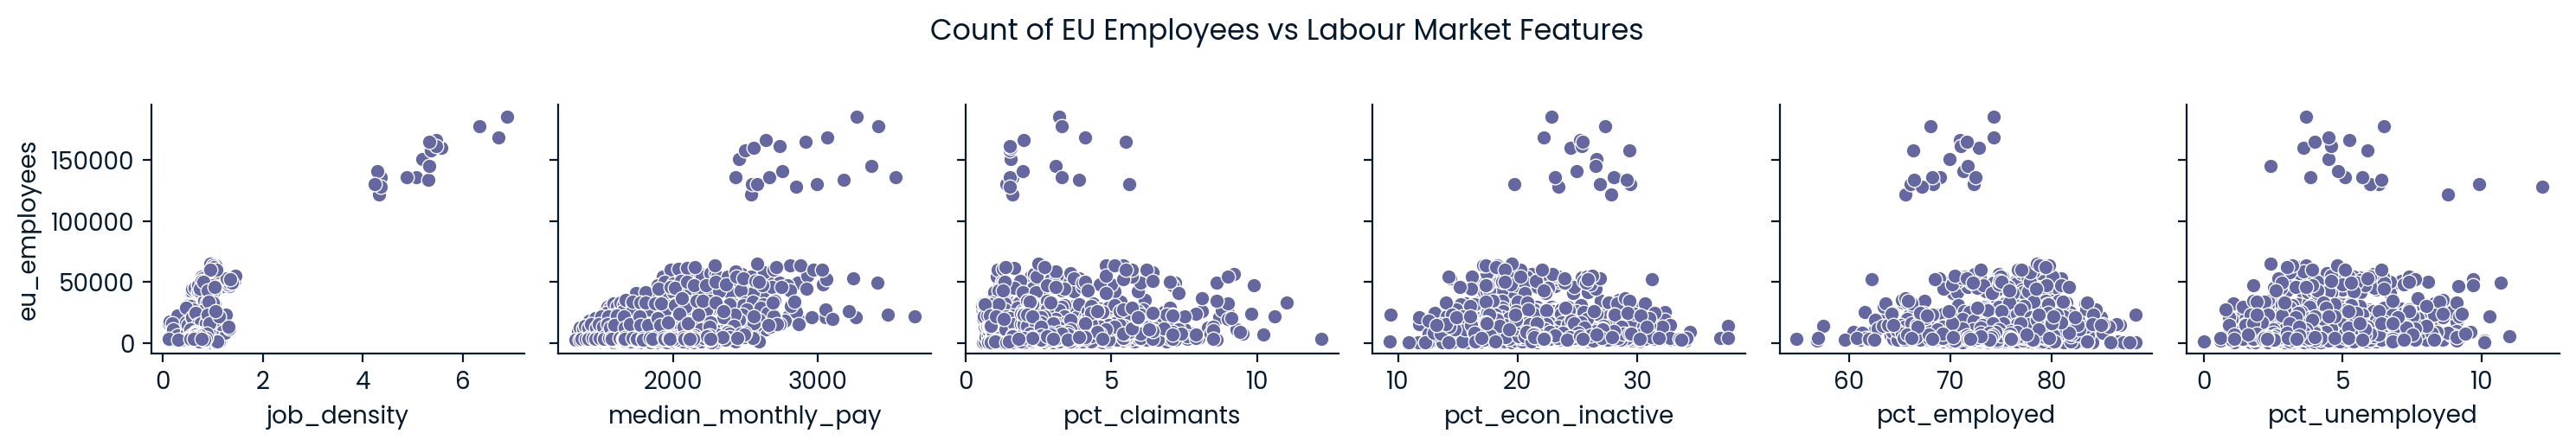

In [36]:
# Convert all x variables to numeric, forcing errors to NaN
for col in labour_df.columns.difference(['eu_employees']):
    labour_df[col] = pd.to_numeric(labour_df[col], errors='coerce')

# Create pairgrid of eu employees vs economic features
# Create a pair grid with 'eu_employees' as the y variable
g = sns.PairGrid(labour_df, y_vars=["eu_employees"], x_vars=labour_df.columns.difference(['eu_employees']))
g.map(sns.scatterplot)

# Add a title to the plot
g.fig.suptitle('Count of EU Employees vs Labour Market Features', y=1.02)

# Adjust the layout
plt.tight_layout()

# Save the figure as a PNG file
g.savefig("regional_labour_market_pairgrid_plot.png")

### 2.4 Political + Migration

In [37]:
pol_mig = [
    'eu_employees',
    'eu_leave_vote_share',
    'eu_nino_issue'
]
pol_mig_df = regional_features[pol_mig]

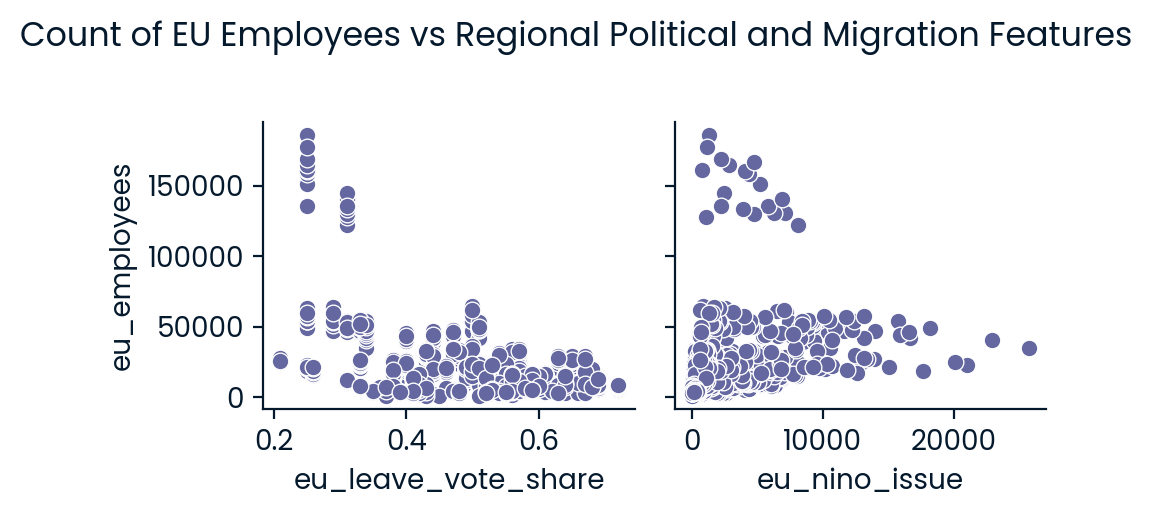

In [38]:
# Convert all x variables to numeric, forcing errors to NaN
for col in pol_mig_df.columns.difference(['eu_employees']):
    pol_mig_df[col] = pd.to_numeric(pol_mig_df[col], errors='coerce')

# Create pairgrid of eu employees vs political and migration features
# Create a pair grid with 'eu_employees' as the y variable
g = sns.PairGrid(pol_mig_df, y_vars=["eu_employees"], x_vars=pol_mig_df.columns.difference(['eu_employees']))
g.map(sns.scatterplot)

# Add a title to the plot
g.fig.suptitle('Count of EU Employees vs Regional Political and Migration Features', y=1.02)

# Adjust the layout
plt.tight_layout()

# Save the figure as a PNG file
g.savefig("regional_political_migration_pairgrid_plot.png")

## 3. Sectoral Analysis

In [39]:
sectoral_features.head()

industry_code    year  ...  migrant_share  turnover_rate
0             A  2015.0  ...       0.210542       0.076663
1             A  2016.0  ...       0.212654       0.078244
2             A  2017.0  ...       0.210383       0.082108
3             A  2018.0  ...       0.207823       0.086398
4             A  2019.0  ...       0.205499       0.084140

[5 rows x 22 columns]

### 3.1 Demographic Features

In [40]:
demographic = [
    'eu_employees',
    'english_requirement_score',
    'female_share',
    'male_share',
    'migrant_share'
]
sec_dem_df = sectoral_features[demographic] 

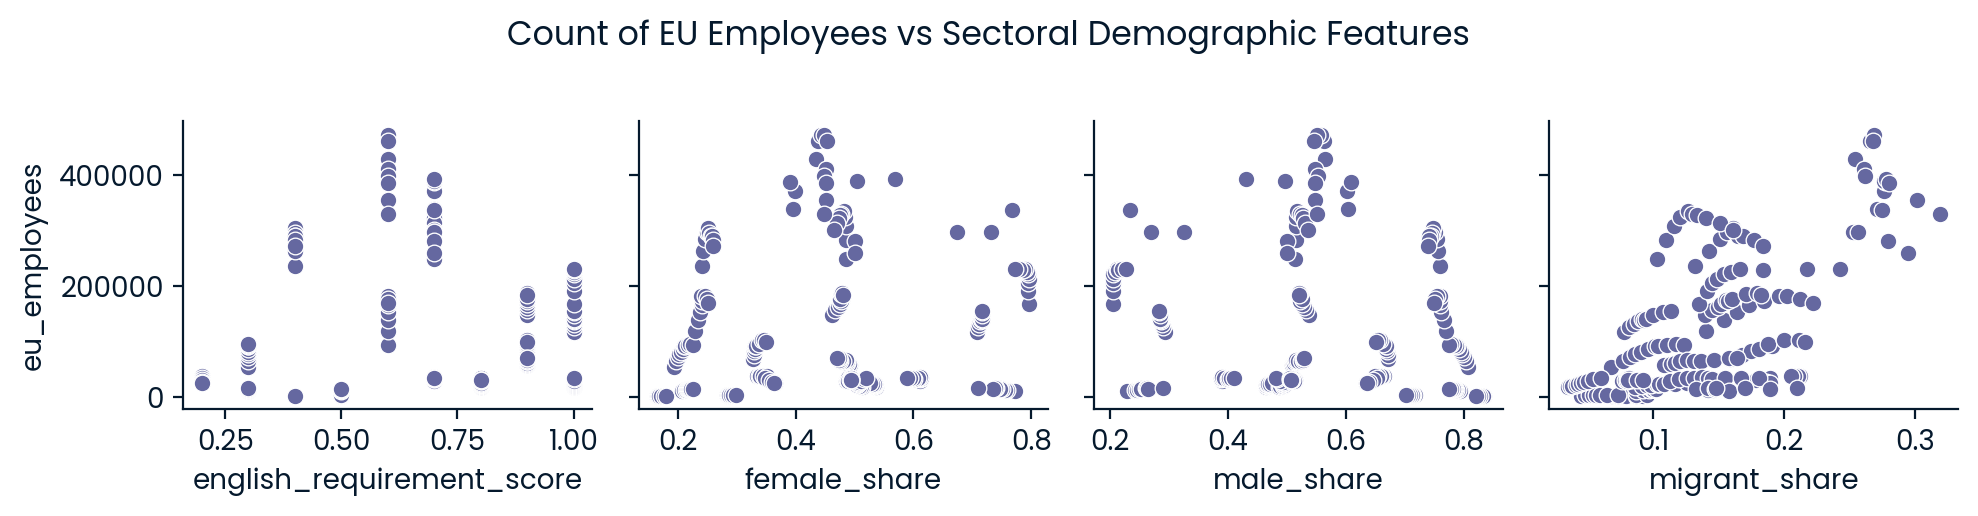

In [41]:
# Convert all x variables to numeric, forcing errors to NaN
for col in sec_dem_df.columns.difference(['eu_employees']):
    sec_dem_df[col] = pd.to_numeric(sec_dem_df[col], errors='coerce')

# Create pairgrid of eu employees vs demographic features
# Create a pair grid with 'eu_employees' as the y variable
g = sns.PairGrid(sec_dem_df, y_vars=["eu_employees"], x_vars=sec_dem_df.columns.difference(['eu_employees']))
g.map(sns.scatterplot)

# Add a title to the plot
g.fig.suptitle('Count of EU Employees vs Sectoral Demographic Features', y=1.02)

# Adjust the layout
plt.tight_layout()

# Save the figure as a PNG file
g.savefig("sectoral_demographic_pairgrid_plot.png")

### 3.2 Labour Market Dynamics

In [42]:
sec_LM = [
    'eu_employees',
    'vacancies',
    'union_presence_score',
    'skill_intensity',
    'median_pay'
]
sec_LM_df = sectoral_features[sec_LM]

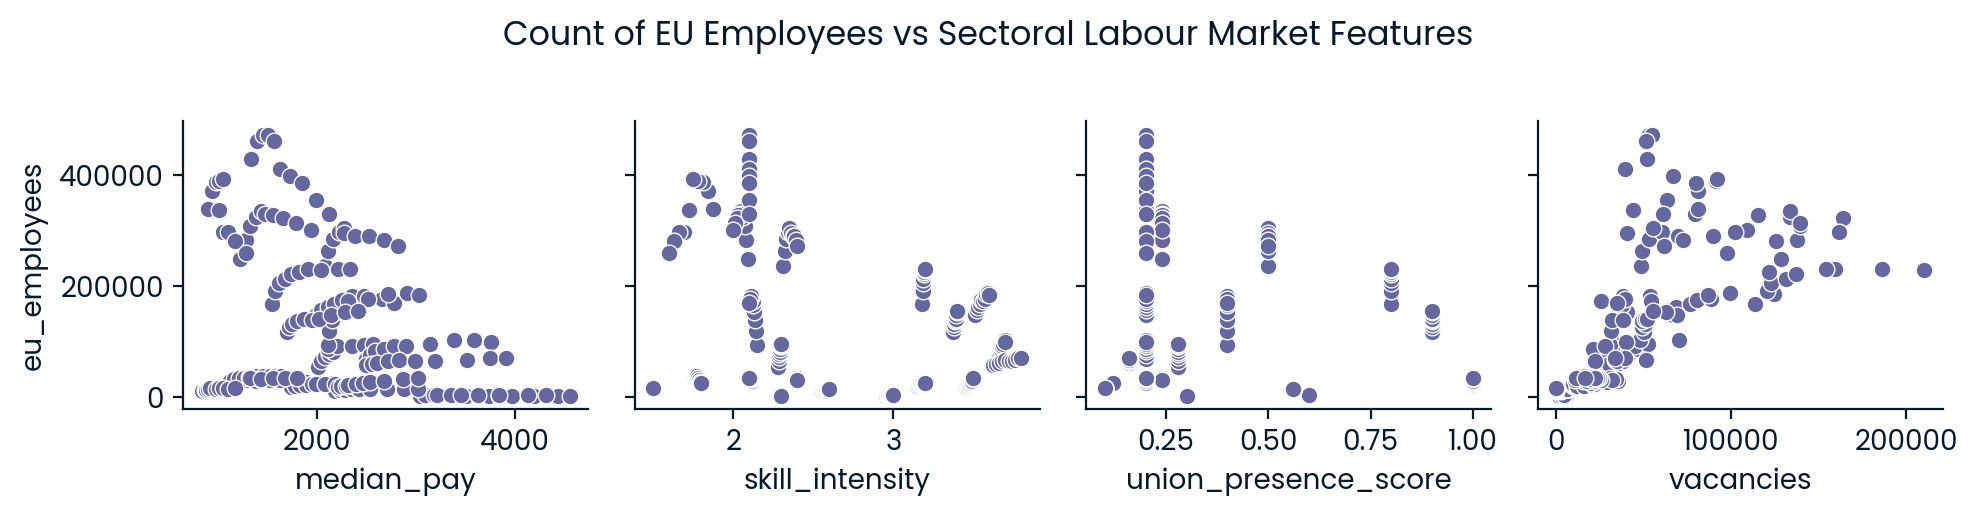

In [43]:
# Convert all x variables to numeric, forcing errors to NaN
for col in sec_LM_df.columns.difference(['eu_employees']):
    sec_LM_df[col] = pd.to_numeric(sec_LM_df[col], errors='coerce')

# Create pairgrid of eu employees vs labour market features
# Create a pair grid with 'eu_employees' as the y variable
g = sns.PairGrid(sec_LM_df, y_vars=["eu_employees"], x_vars=sec_LM_df.columns.difference(['eu_employees']))
g.map(sns.scatterplot)

# Add a title to the plot
g.fig.suptitle('Count of EU Employees vs Sectoral Labour Market Features', y=1.02)

# Adjust the layout
plt.tight_layout()

# Save the figure as a PNG file
g.savefig("sectoral_labour_market_pairgrid_plot.png")

### 3.3 Migration Policy Features

In [44]:
migration = [
    'eu_employees',
    'skilled_worker_visa_eligibility_share',
    'tier2_visa_eligibility_share'
]
migration_df = sectoral_features[migration]

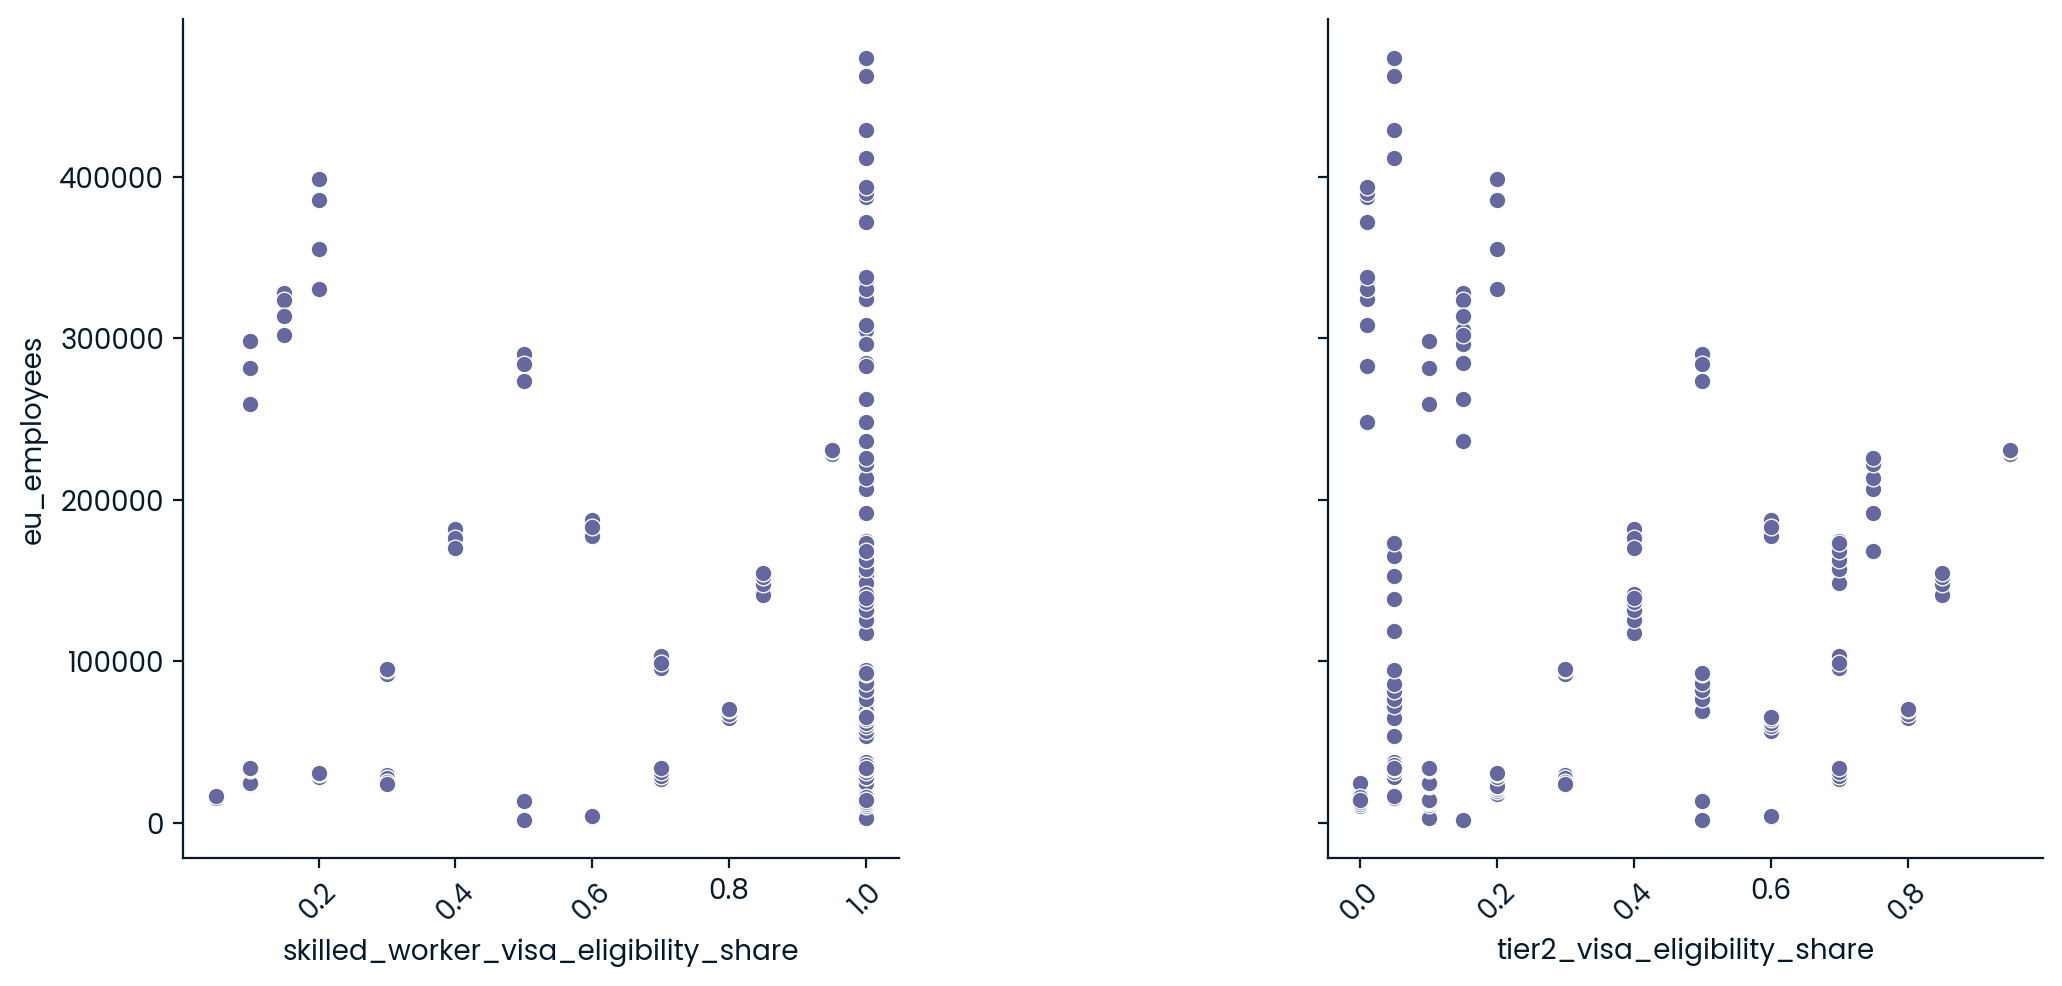

In [47]:
# Convert all x variables to numeric, forcing errors to NaN
for col in migration_df.columns.difference(['eu_employees']):
    migration_df[col] = pd.to_numeric(migration_df[col], errors='coerce')

# Create pairgrid of eu employees vs migration policy features
# Create a pair grid with 'eu_employees' as the y variable
g = sns.PairGrid(
    migration_df, 
    y_vars=["eu_employees"], 
    x_vars=migration_df.columns.difference(['eu_employees'])
)

# Map the scatterplot to the grid
g.map(sns.scatterplot)

# Adjust the layout
plt.tight_layout()

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Add more space between the plots
g.fig.subplots_adjust(hspace=0.6, wspace=0.6)

# Adjust the figure size to prevent cropping
g.fig.set_size_inches(12, 6)

# Save the figure as a PNG file
g.savefig("migration_policy_pairgrid_plot.png")

### 3.4 Public vs Private Sector exposure

In [46]:
# Initialize a list to store the results
results = []

for col in ['pub_sec_high', 'pub_sec_medium', 'pub_sec_low']:
    group0 = sectoral_features.loc[sectoral_features[col] == 0, 'eu_employees']
    group1 = sectoral_features.loc[sectoral_features[col] == 1, 'eu_employees']
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    results.append({'Category': col, 't_stat': t_stat, 'p_val': p_val})

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('public_private_sector_ttest_results.csv', index=False)

“T-tests indicated no statistically significant difference in EU employee counts between industries classified as high public sector and others (p = 0.781). However, medium public sector industries had significantly higher EU employee counts compared to non-medium public sector industries (t = 6.15, p < 0.001), while low public sector industries had significantly lower EU employee counts compared to their counterparts (t = -3.83, p < 0.001). This suggests a clear gradient in EU employment levels across public sector intensity classifications.”